In [310]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [311]:
file_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [312]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [313]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [314]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [315]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-13') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-13') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-13') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-07-01') & (df1_1hr.index < '2020-07-07')
# date_mask2 = (df2_1hr.index >= '2020-07-01') & (df2_1hr.index < '2020-07-07')
# date_mask3 = (df3_1hr.index >= '2020-07-01') & (df3_1hr.index < '2020-07-07')

# # Post-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-10-08') & (df1_1hr.index < '2020-10-14')
# date_mask2 = (df2_1hr.index >= '2020-10-08') & (df2_1hr.index < '2020-10-14')
# date_mask3 = (df3_1hr.index >= '2020-10-08') & (df3_1hr.index < '2020-10-14')

# Winter
date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')

In [316]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [317]:
type(SM_sensor1)

pandas.core.series.Series

In [318]:
work_df = pd.concat([SM_sensor1, SM_sensor2, SM_sensor3, SM_sensor4, SM_sensor5, SM_sensor6, SM_sensor7,
                     SM_sensor8, SM_sensor9, SM_sensor10, ST_sensor1, ST_sensor2, ST_sensor3, ST_sensor4,
                    ST_sensor5, ST_sensor6, ST_sensor7, ST_sensor8, ST_sensor9, ST_sensor10, Rainfall, Air_Temp], axis = 1)
work_df.tail()

S1SM       S2SM   S3SM      S4SM      S5SM      S6SM  \
date                                                                            
2020-12-25 19:00:00  5.503333  10.266667  10.44  6.770000  9.131667  7.000000   
2020-12-25 20:00:00  5.488333  10.263333  10.44  6.770000  9.136667  7.000000   
2020-12-25 21:00:00  5.478333  10.260000  10.44  6.766667  9.138333  7.000000   
2020-12-25 22:00:00  5.473333  10.260000  10.44  6.760000  9.136667  6.998333   
2020-12-25 23:00:00  5.470000  10.258333  10.44  6.760000  9.138333  6.990000   

                          S7SM       S8SM  S9SM     S10SM  ...     S3Temp  \
date                                                       ...              
2020-12-25 19:00:00  15.916667  18.973333   NaN  6.350000  ...  17.007833   
2020-12-25 20:00:00  15.896667  18.960000   NaN  6.350000  ...  17.027333   
2020-12-25 21:00:00  15.863333  18.945000   NaN  6.356667  ...  17.066500   
2020-12-25 22:00:00  15.843333  18.923333   NaN  6.360000  ...  17.086167   
2020-12-25 23:00:00  15.816667  18.916667   NaN  6.360000  ...  17.112000   

                        S4Temp     S5Temp     S6Temp     S7Temp     S8Temp  \
date                                                                         
2020-12-25 19:00:00  19.102667  17.899833  19.407333  15.779833  17.689000   
2020-12-25 20:00:00  19.100333  17.932333  19.399667  15.690000  17.681333   
2020-12-25 21:00:00  19.100167  17.945500  19.386667  15.548333  17.693000   
2020-12-25 22:00:00  19.102833  17.973833  19.385667  15.385667  17.712167   
2020-12-25 23:00:00  19.089667  17.964833  19.380167  15.210833  17.720167   

                     S9Temp    S10Temp  Int_Rainfall (mm)  Temp (0C)  
date                                                                  
2020-12-25 19:00:00     NaN  17.565167                0.0    11.4250  
2020-12-25 20:00:00     NaN  17.583333                0.0    10.3500  
2020-12-25 21:00:00     NaN  17.583333                0.0     9.6700  
2020-12-25 22:00:00     NaN  17.604167                0.0     8.9325  
2020-12-25 23:00:00     NaN  17.619667                0.0     8.5700  

[5 rows x 22 columns]

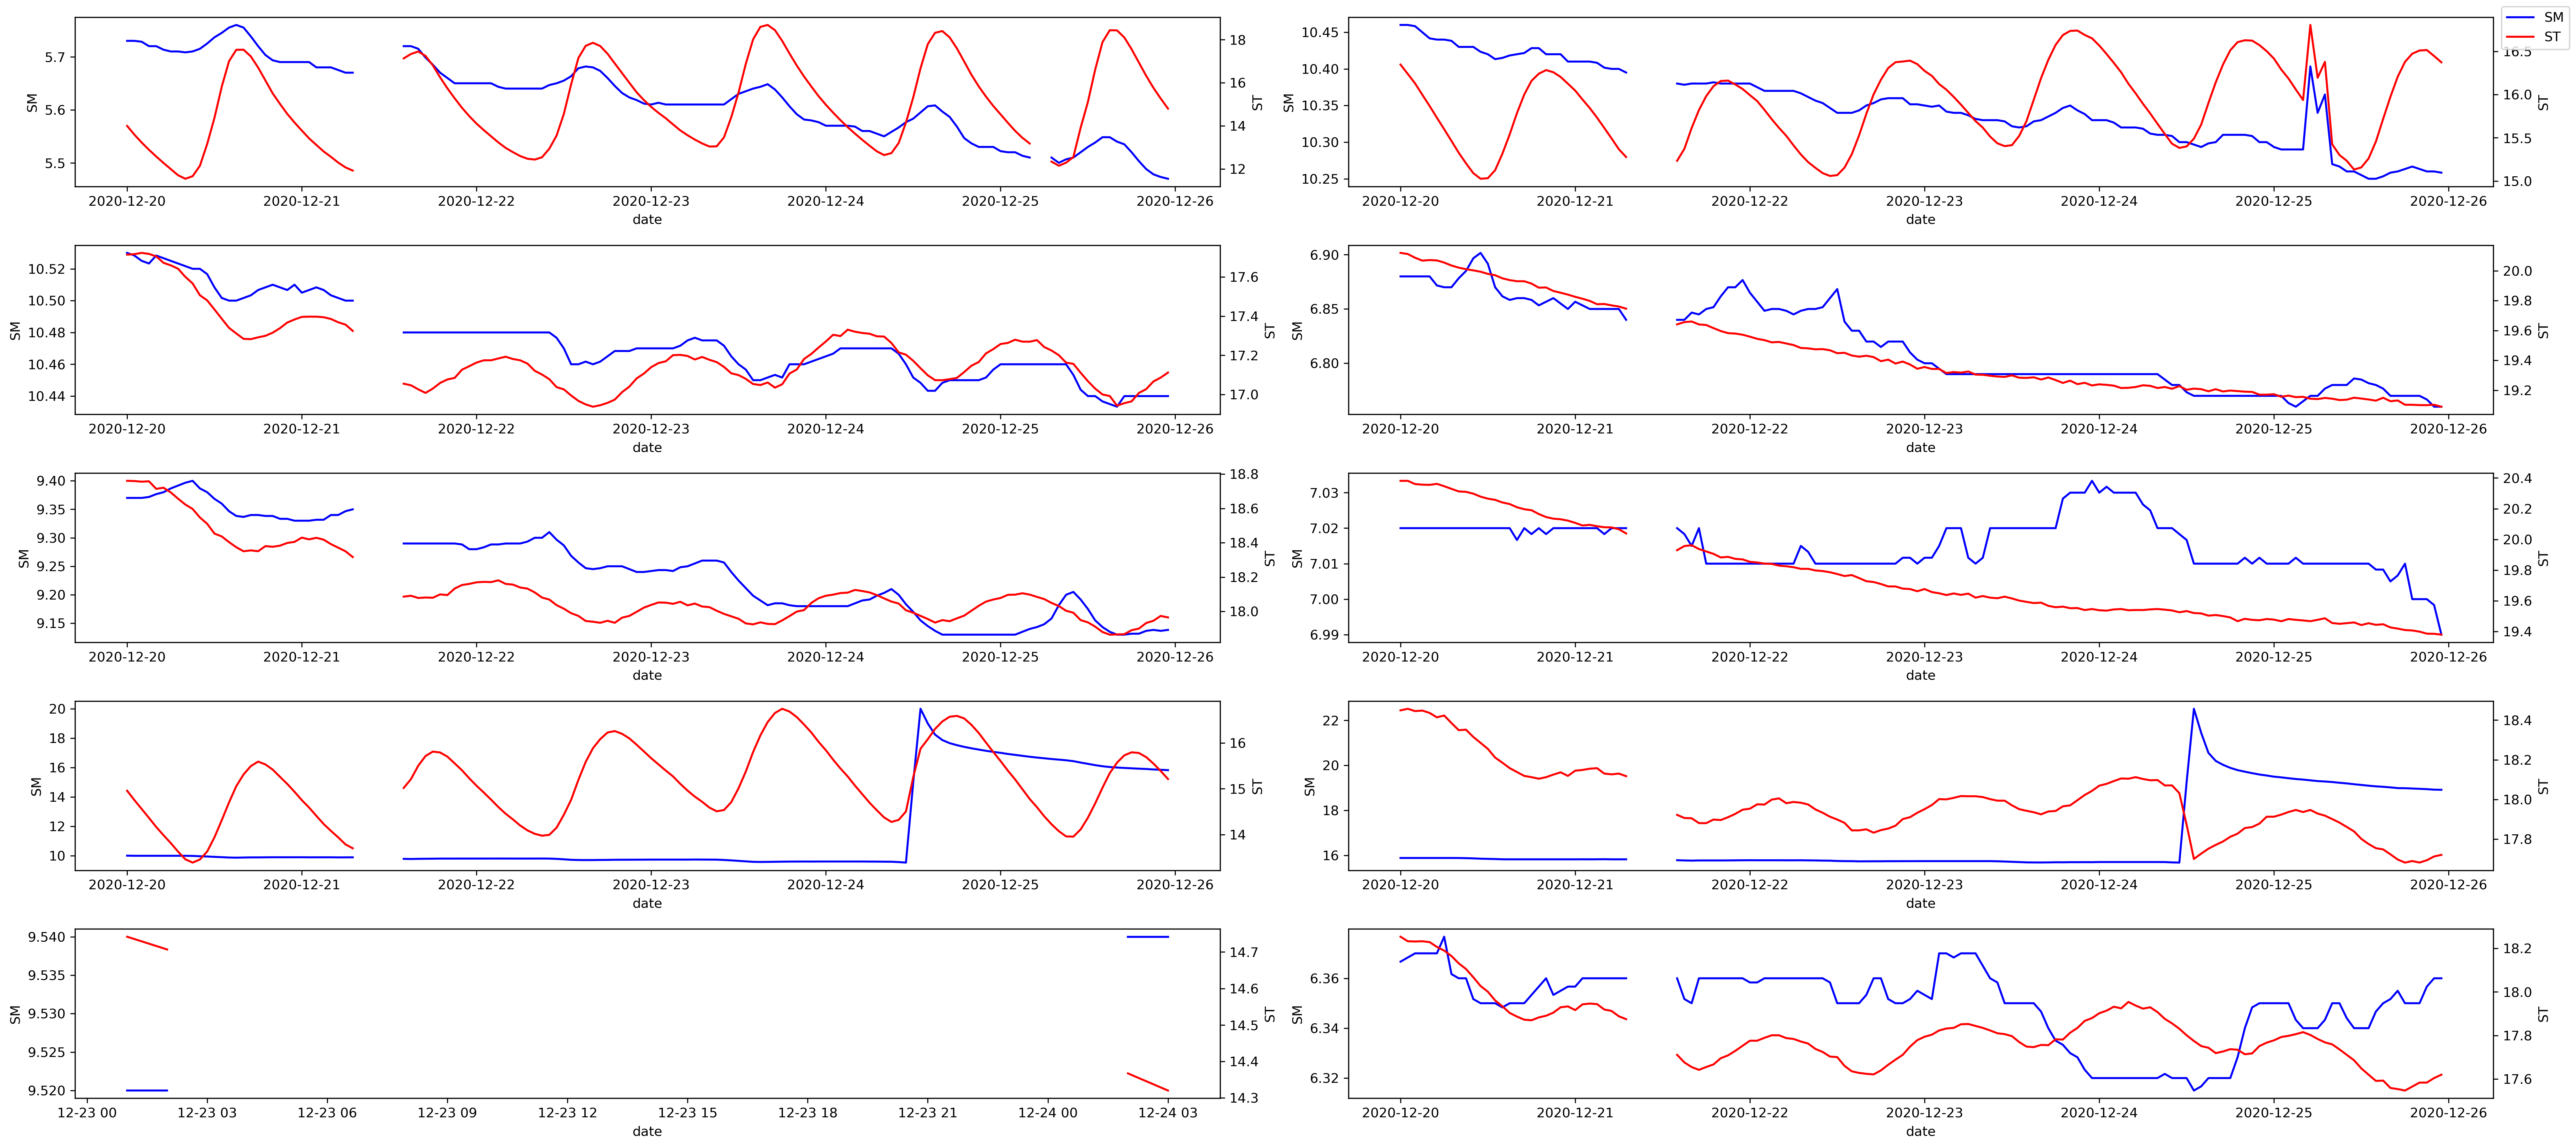

In [319]:
fg, ax = plt.subplots(5, 2, figsize=(9*3, 4*3), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(work_df.index, work_df.S1SM,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(work_df.index, work_df.S1Temp,'r' , label = 'ST')

ac2 = ax[0,1].twinx()
ax[0,1].plot(work_df.index, work_df.S2SM,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(work_df.index, work_df.S2Temp,'r' )

ac3 = ax[1,0].twinx()
ax[1,0].plot(work_df.index, work_df.S3SM,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(work_df.index, work_df.S3Temp,'r')

ac4 = ax[1,1].twinx()
ax[1,1].plot(work_df.index, work_df.S4SM,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(work_df.index, work_df.S4Temp,'r')

ac5 = ax[2,0].twinx()
ax[2,0].plot(work_df.index, work_df.S5SM,'b')
ax[2,0].set(xlabel = 'date', ylabel = 'SM')
ac5.set(xlabel = 'date', ylabel = 'ST')
ac5.plot(work_df.index, work_df.S5Temp,'r')

ac6 = ax[2,1].twinx()
ax[2,1].plot(work_df.index, work_df.S6SM,'b')
ax[2,1].set(xlabel = 'date', ylabel = 'SM')
ac6.set(xlabel = 'date', ylabel = 'ST')
ac6.plot(work_df.index, work_df.S6Temp,'r' )

ac7 = ax[3,0].twinx()
ax[3,0].plot(work_df.index, work_df.S7SM,'b')
ax[3,0].set(xlabel = 'date', ylabel = 'SM')
ac7.set(xlabel = 'date', ylabel = 'ST')
ac7.plot(work_df.index, work_df.S7Temp,'r' )

ac8 = ax[3,1].twinx()
ax[3,1].plot(work_df.index, work_df.S8SM,'b')
ax[3,1].set(xlabel = 'date', ylabel = 'SM')
ac8.set(xlabel = 'date', ylabel = 'ST')
ac8.plot(work_df.index, work_df.S8Temp,'r' )

ac9 = ax[4,0].twinx()
ax[4,0].plot(work_df.index, work_df.S9SM,'b')
ax[4,0].set(xlabel = 'date', ylabel = 'SM')
ac9.set(xlabel = 'date', ylabel = 'ST')
ac9.plot(work_df.index, work_df.S9Temp,'r' )

ac10 = ax[4,1].twinx()
ax[4,1].plot(work_df.index, work_df.S10SM,'b')
ax[4,1].set(xlabel = 'date', ylabel = 'SM')
ac10.set(xlabel = 'date', ylabel = 'ST')
ac10.plot(work_df.index, work_df.S10Temp,'r' )

plt.tight_layout()
fg.legend();


In [320]:
max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [321]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [322]:
## Soil Temperature and air temperature lag

# Temperature lags
# T_S1_lag = max_S1ST_hour - max_AirT_hour
# T_S5_lag = max_S5ST_hour - max_AirT_hour
# T_S6_lag = max_S6ST_hour - max_AirT_hour
# T_S7_lag = max_S7ST_hour - max_AirT_hour
# T_S8_lag = max_S8ST_hour - max_AirT_hour
# T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
# SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
# SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
# SMT_S6_lag = max_S6ST_hour - max_S6SM_hour
# SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
# SMT_S8_lag = max_S8ST_hour - max_S8SM_hour
# SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

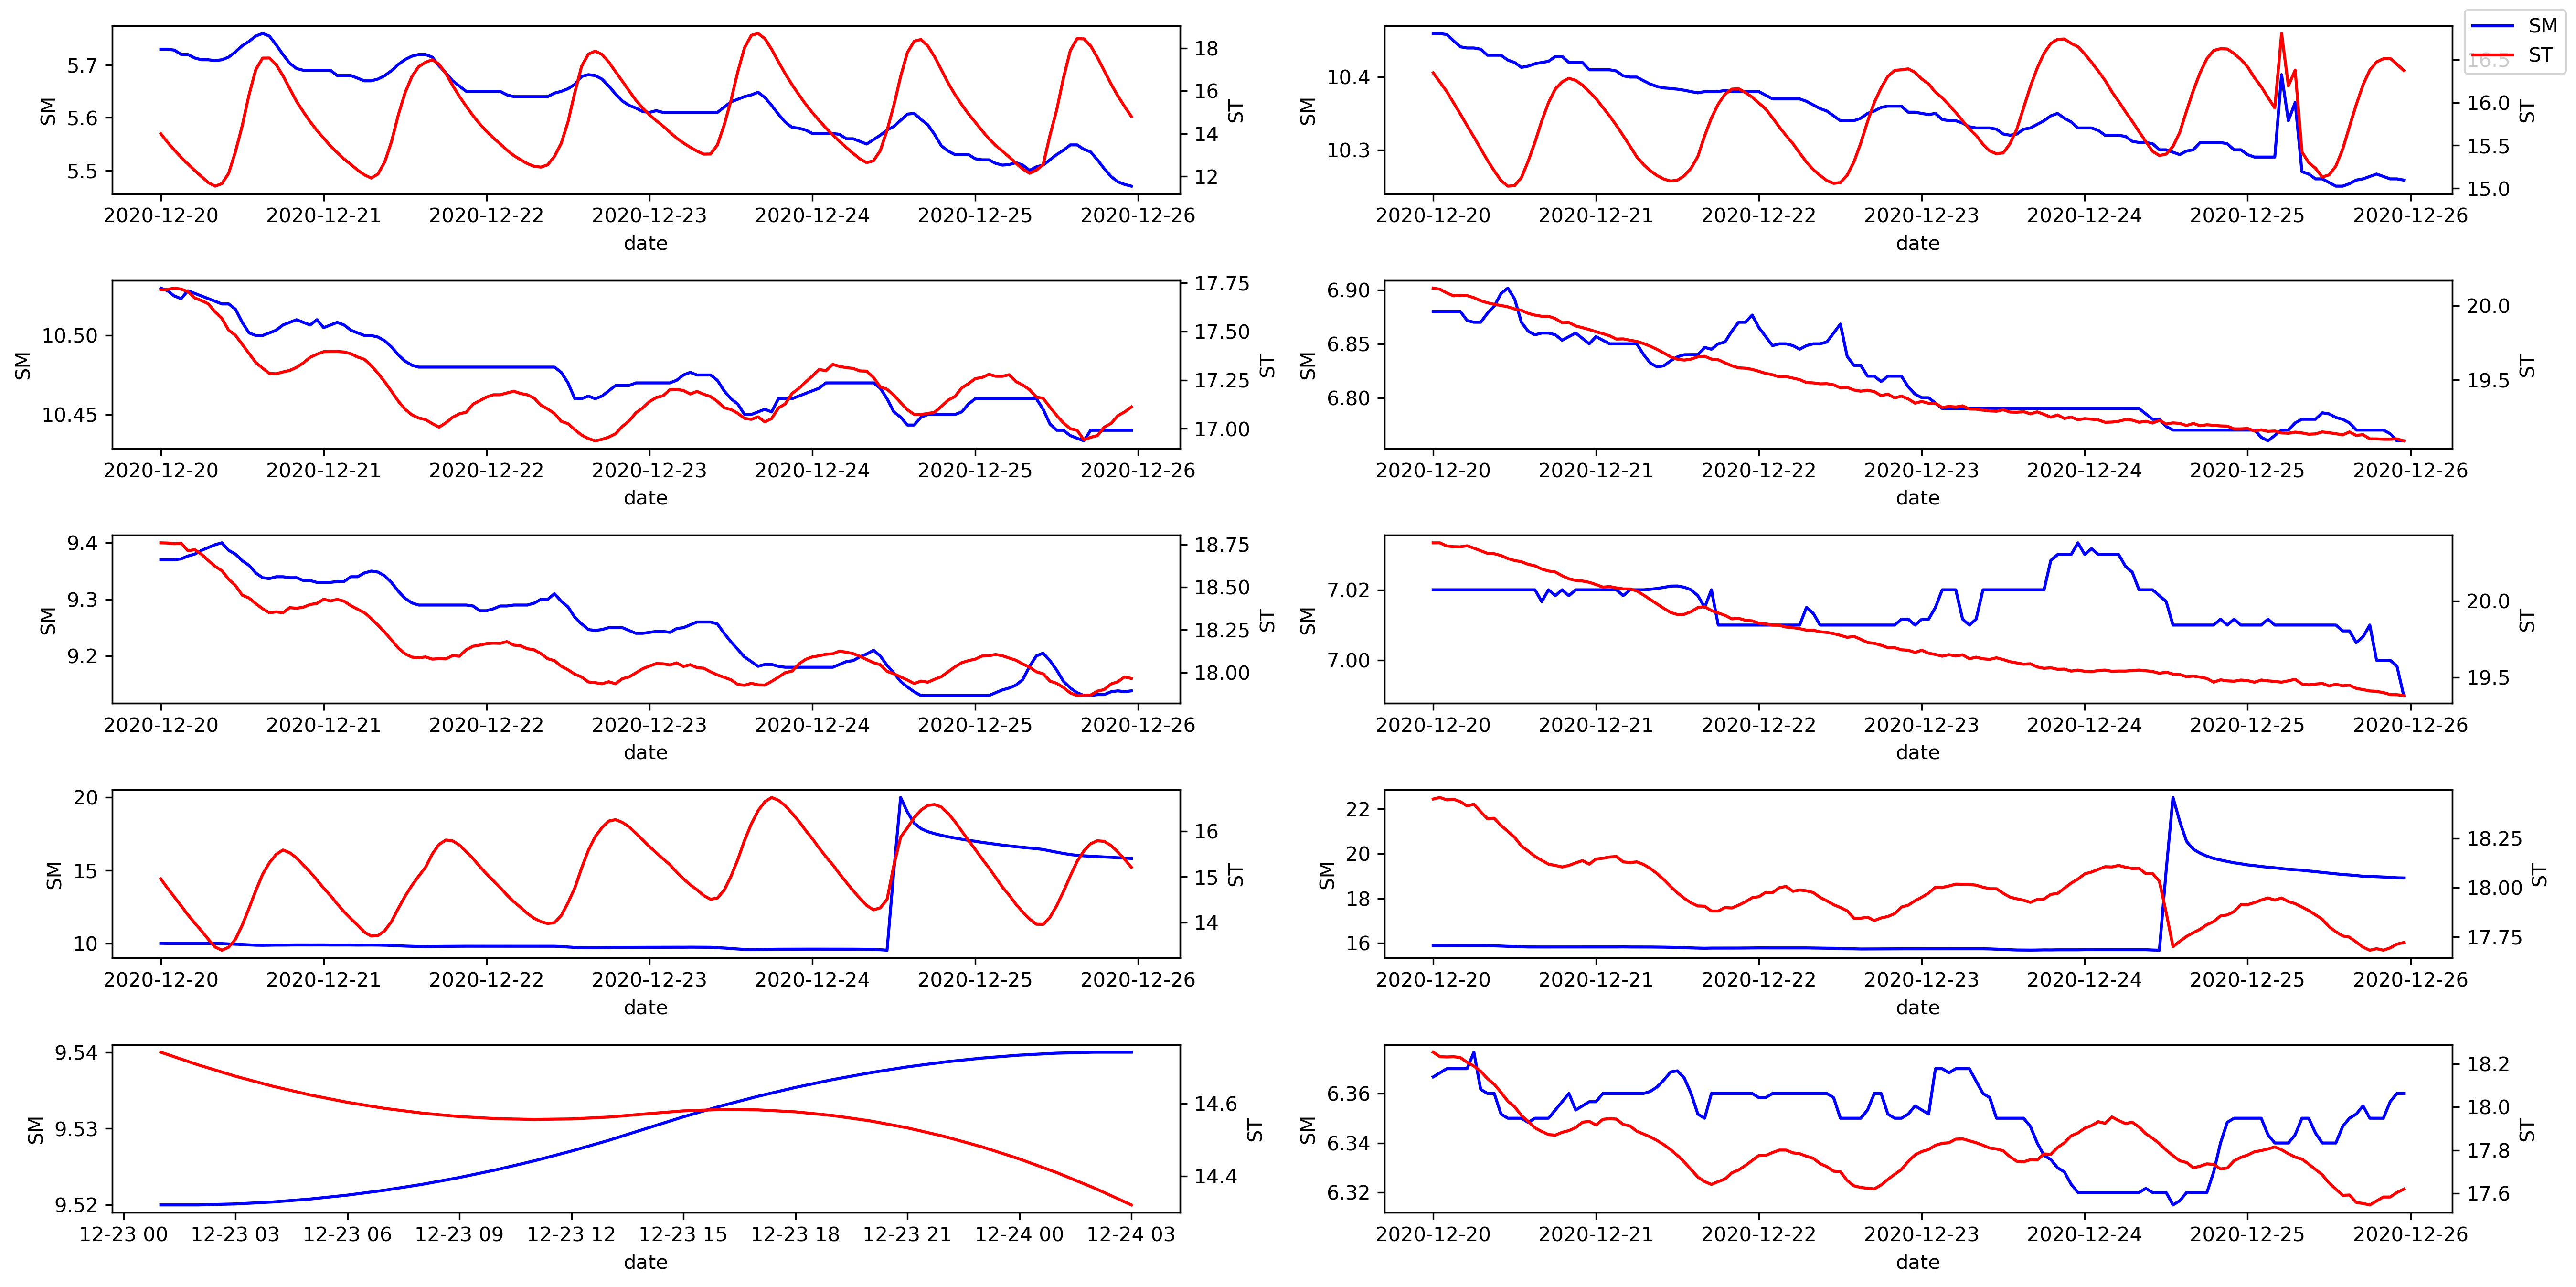

In [323]:
fg, ax = plt.subplots(5, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(SM_sensor1,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(ST_sensor1,'r' , label = 'ST')

ac2 = ax[0,1].twinx()
ax[0,1].plot(SM_sensor2,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(ST_sensor2,'r' )

ac3 = ax[1,0].twinx()
ax[1,0].plot(SM_sensor3,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(ST_sensor3,'r')

ac4 = ax[1,1].twinx()
ax[1,1].plot(SM_sensor4,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(ST_sensor4,'r')

ac5 = ax[2,0].twinx()
ax[2,0].plot(SM_sensor5,'b')
ax[2,0].set(xlabel = 'date', ylabel = 'SM')
ac5.set(xlabel = 'date', ylabel = 'ST')
ac5.plot(ST_sensor5,'r')

ac6 = ax[2,1].twinx()
ax[2,1].plot(SM_sensor6,'b')
ax[2,1].set(xlabel = 'date', ylabel = 'SM')
ac6.set(xlabel = 'date', ylabel = 'ST')
ac6.plot(ST_sensor6,'r' )

ac7 = ax[3,0].twinx()
ax[3,0].plot(SM_sensor7,'b')
ax[3,0].set(xlabel = 'date', ylabel = 'SM')
ac7.set(xlabel = 'date', ylabel = 'ST')
ac7.plot(ST_sensor7,'r')

ac8 = ax[3,1].twinx()
ax[3,1].plot(SM_sensor8,'b')
ax[3,1].set(xlabel = 'date', ylabel = 'SM')
ac8.set(xlabel = 'date', ylabel = 'ST')
ac8.plot(ST_sensor8,'r')

ac9 = ax[4,0].twinx()
ax[4,0].plot(SM_sensor9,'b')
ax[4,0].set(xlabel = 'date', ylabel = 'SM')
ac9.set(xlabel = 'date', ylabel = 'ST')
ac9.plot(ST_sensor9,'r')

ac10 = ax[4,1].twinx()
ax[4,1].plot(SM_sensor10,'b')
ax[4,1].set(xlabel = 'date', ylabel = 'SM')
ac10.set(xlabel = 'date', ylabel = 'ST')
ac10.plot(ST_sensor10,'r' )

plt.tight_layout()
fg.legend();


In [324]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# Null - Hypothesis test for Sensor-1 Soil Moisture
print('############ Sensor - 1 ############')
S1_SM = SM_sensor1
result_S1_SM = adfuller(S1_SM)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-2 Soil Moisture
print('############ Sensor - 2 ############')
S2_SM = SM_sensor2
result_S2_SM = adfuller(S2_SM)
print('ADF Statistics: %f' % result_S2_SM[0])
print('p-value: %f' % result_S2_SM[1])
print('Critical Values:')
for key, value in result_S2_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S2_SM[0] < result_S2_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-3 Soil Moisture
print('############ Sensor - 3 ############')
S3_SM = SM_sensor3
result_S3_SM = adfuller(S3_SM)
print('ADF Statistics: %f' % result_S3_SM[0])
print('p-value: %f' % result_S3_SM[1])
print('Critical Values:')
for key, value in result_S3_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S3_SM[0] < result_S3_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-4 Soil Moisture
print('############ Sensor - 4 ############')
S4_SM = SM_sensor4
result_S4_SM = adfuller(S4_SM)
print('ADF Statistics: %f' % result_S4_SM[0])
print('p-value: %f' % result_S4_SM[1])
print('Critical Values:')
for key, value in result_S4_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S4_SM[0] < result_S4_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 5 ############')
# S5_SM = SM_sensor5
# result_S5_SM = adfuller(S5_SM)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-6 Soil Moisture
# print('############ Sensor - 6 ############')
# S6_SM = SM_sensor6
# result_S6_SM = adfuller(S6_SM)
# print('ADF Statistics: %f' % result_S6_SM[0])
# print('p-value: %f' % result_S6_SM[1])
# print('Critical Values:')
# for key, value in result_S6_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_SM[0] < result_S6_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-7 Soil Moisture
# print('############ Sensor - 7 ############')
# S7_SM = SM_sensor7
# result_S7_SM = adfuller(S7_SM)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-8 Soil Moisture
# print('############ Sensor - 8 ############')
# S8_SM = SM_sensor8
# result_S8_SM = adfuller(S8_SM)
# print('ADF Statistics: %f' % result_S8_SM[0])
# print('p-value: %f' % result_S8_SM[1])
# print('Critical Values:')
# for key, value in result_S8_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_SM[0] < result_S8_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
# # Null - Hypothesis test for Sensor-9 Soil Moisture
# # print('############ Sensor - 9 ############')
# # S9_SM = SM_sensor9
# # result_S9_SM = adfuller(S9_SM)
# # print('ADF Statistics: %f' % result_S9_SM[0])
# # print('p-value: %f' % result_S9_SM[1])
# # print('Critical Values:')
# # for key, value in result_S9_SM[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S9_SM[0] < result_S9_SM[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-10 Soil Moisture
# print('############ Sensor - 10 ############')
# S10_SM = SM_sensor10
# result_S10_SM = adfuller(S10_SM)
# print('ADF Statistics: %f' % result_S10_SM[0])
# print('p-value: %f' % result_S10_SM[1])
# print('Critical Values:')
# for key, value in result_S10_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S10_SM[0] < result_S10_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -0.119269
p-value: 0.947485
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 2 ############
ADF Statistics: -0.894463
p-value: 0.789790
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 3 ############
ADF Statistics: -1.835799
p-value: 0.362839
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary
############ Sensor - 4 ############
ADF Statistics: -1.202518
p-value: 0.672511
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Failed to Reject Ho - Time Series is Non-Stationary


In [325]:
# # Null - Hypothesis test for Sensor-1 Soil Moisture
# print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
# print('############ Sensor - 1 ############')
# S1_ST = ST_sensor1.values
# result_S1_ST = adfuller(S1_ST)
# print('ADF Statistics: %f' % result_S1_ST[0])
# print('p-value: %f' % result_S1_ST[1])
# print('Critical Values:')
# for key, value in result_S1_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S1_ST[0] < result_S1_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# # Null - Hypothesis test for Sensor-5 Soil Moisture
# print('############ Sensor - 5 ############')
# # S5_ST = ST_sensor5.values
# # result_S5_ST = adfuller(S5_ST)
# # print('ADF Statistics: %f' % result_S5_ST[0])
# # print('p-value: %f' % result_S5_ST[1])
# # print('Critical Values:')
# # for key, value in result_S5_ST[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S5_ST[0] < result_S5_ST[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-6 Soil Moisture
# print('############ Sensor - 6 ############')
# # S6_ST = ST_sensor6.values
# # result_S6_ST = adfuller(S6_ST)
# # print('ADF Statistics: %f' % result_S6_ST[0])
# # print('p-value: %f' % result_S6_ST[1])
# # print('Critical Values:')
# # for key, value in result_S6_ST[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S6_ST[0] < result_S6_ST[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-7 Soil Moisture
# print('############ Sensor - 7 ############')
# # S7_ST = ST_sensor7.values
# # result_S7_ST = adfuller(S7_ST)
# # print('ADF Statistics: %f' % result_S7_ST[0])
# # print('p-value: %f' % result_S7_ST[1])
# # print('Critical Values:')
# # for key, value in result_S7_ST[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S7_ST[0] < result_S7_ST[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-8 Soil Moisture
# print('############ Sensor - 8 ############')
# # S8_ST = ST_sensor8.values
# # result_S8_ST = adfuller(S8_ST)
# # print('ADF Statistics: %f' % result_S8_ST[0])
# # print('p-value: %f' % result_S8_ST[1])
# # print('Critical Values:')
# # for key, value in result_S8_ST[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S8_ST[0] < result_S8_ST[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-9 Soil Moisture
# print('############ Sensor - 9 ############')
# # S9_ST = ST_sensor9.values
# # result_S9_ST = adfuller(S9_ST)
# # print('ADF Statistics: %f' % result_S9_ST[0])
# # print('p-value: %f' % result_S9_ST[1])
# # print('Critical Values:')
# # for key, value in result_S9_ST[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S9_ST[0] < result_S9_ST[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")

## Stationarity check after first order differencing

-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 1 ############
ADF Statistics: -5.996222
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 2 ############
ADF Statistics: -6.778906
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 3 ############
ADF Statistics: -6.989757
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 4 ############
ADF Statistics: -8.859364
p-value: 0.000000
Critical Values:
	1%: -3.477
	5%: -2.882
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 5 ############


<ipython-input-326-f93bd837b937>:213: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


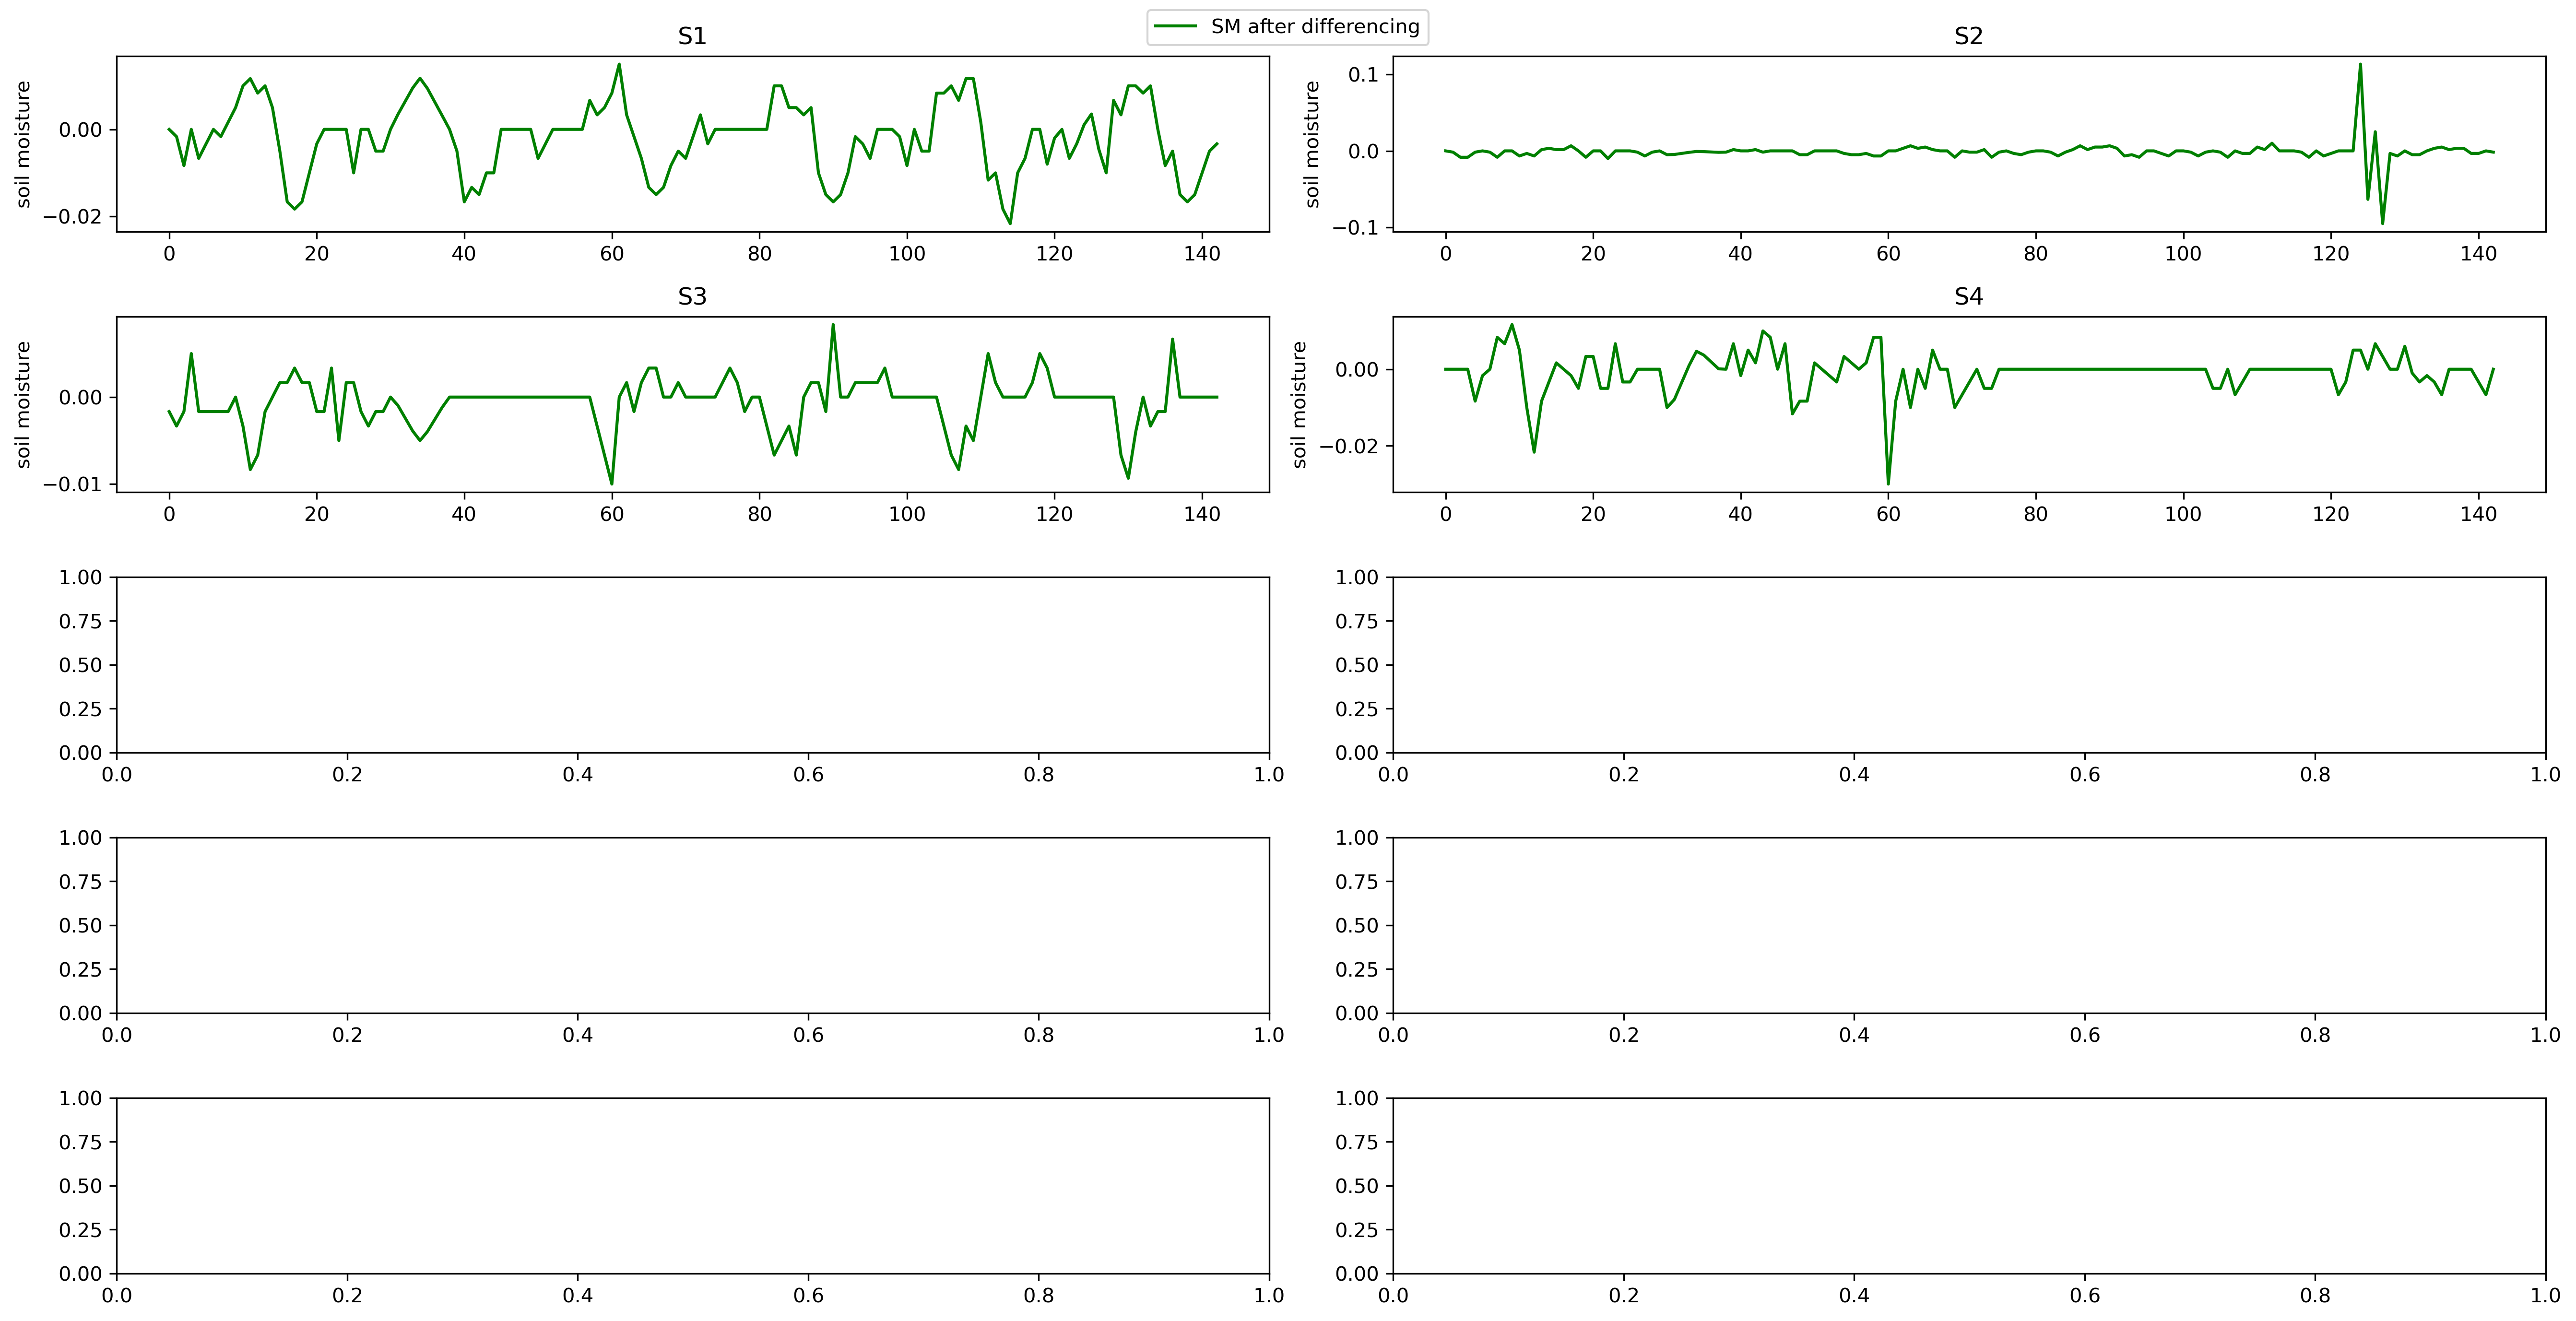

In [326]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 1 ############')

S1_SM_Diff = np.diff(SM_sensor1)
# plt.plot(S1_SM_Diff)
len(S1_SM_Diff)

# S1_SM = SM_sensor1.values
result_S1_SM = adfuller(S1_SM_Diff)
print('ADF Statistics: %f' % result_S1_SM[0])
print('p-value: %f' % result_S1_SM[1])
print('Critical Values:')
for key, value in result_S1_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_SM[0] < result_S1_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 2 ############')

S2_SM_Diff = np.diff(SM_sensor2)
len(S2_SM_Diff)

# S1_SM = SM_sensor1.values
result_S2_SM = adfuller(S2_SM_Diff)
print('ADF Statistics: %f' % result_S2_SM[0])
print('p-value: %f' % result_S2_SM[1])
print('Critical Values:')
for key, value in result_S2_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S2_SM[0] < result_S2_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 3 ############')

S3_SM_Diff = np.diff(SM_sensor3)
len(S3_SM_Diff)

# S1_SM = SM_sensor1.values
result_S3_SM = adfuller(S3_SM_Diff)
print('ADF Statistics: %f' % result_S3_SM[0])
print('p-value: %f' % result_S3_SM[1])
print('Critical Values:')
for key, value in result_S3_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S3_SM[0] < result_S3_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 4 ############')

S4_SM_Diff = np.diff(SM_sensor4)
len(S4_SM_Diff)

# S1_SM = SM_sensor1.values
result_S4_SM = adfuller(S4_SM_Diff)
print('ADF Statistics: %f' % result_S4_SM[0])
print('p-value: %f' % result_S4_SM[1])
print('Critical Values:')
for key, value in result_S4_SM[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S4_SM[0] < result_S4_SM[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 5 ############')

# S5_SM_Diff = np.diff(SM_sensor5)

# result_S5_SM = adfuller(S5_SM_Diff)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-6 Soil Moisture
# print('############ Sensor - 6 ############')

# S6_SM_Diff = np.diff(SM_sensor6)
# result_S6_SM = adfuller(S6_SM_Diff)
# print('ADF Statistics: %f' % result_S6_SM[0])
# print('p-value: %f' % result_S6_SM[1])
# print('Critical Values:')
# for key, value in result_S6_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_SM[0] < result_S6_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-7 Soil Moisture
# print('############ Sensor - 7 ############')

# S7_SM_Diff = np.diff(SM_sensor7)
# result_S7_SM = adfuller(S7_SM_Diff)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-8 Soil Moisture
# print('############ Sensor - 8 ############')

# S8_SM_Diff = np.diff(SM_sensor8)
# result_S8_SM = adfuller(S8_SM_Diff)
# print('ADF Statistics: %f' % result_S8_SM[0])
# print('p-value: %f' % result_S8_SM[1])
# print('Critical Values:')
# for key, value in result_S8_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_SM[0] < result_S8_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 9 ############')

# # S9_SM_Diff = np.diff(SM_sensor9)
# # len(S9_SM_Diff)

# # S1_SM = SM_sensor1.values
# # result_S9_SM = adfuller(S9_SM_Diff)
# # print('ADF Statistics: %f' % result_S9_SM[0])
# # print('p-value: %f' % result_S9_SM[1])
# # print('Critical Values:')
# # for key, value in result_S9_SM[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S9_SM[0] < result_S9_SM[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 10 ############')

# S10_SM_Diff = np.diff(SM_sensor10)
# len(S10_SM_Diff)

# S1_SM = SM_sensor1.values
# result_S10_SM = adfuller(S10_SM_Diff)
# print('ADF Statistics: %f' % result_S10_SM[0])
# print('p-value: %f' % result_S10_SM[1])
# print('Critical Values:')
# for key, value in result_S10_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S10_SM[0] < result_S10_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
fig, ax = plt.subplots(5, 2, figsize = (9*2, 4*2.3), dpi = 300)

ax[0,0].plot(S1_SM_Diff, 'green', label = 'SM after differencing')
ax[0,0].set(title='S1', ylabel = 'soil moisture')

ax[0,1].plot(S2_SM_Diff, 'green')
ax[0,1].set(title='S2', ylabel = 'soil moisture')

ax[1,0].plot(S3_SM_Diff, 'green')
ax[1,0].set(title='S3', ylabel = 'soil moisture')

ax[1,1].plot(S4_SM_Diff, 'green')
ax[1,1].set(title='S4', ylabel = 'soil moisture')

# ax[2,0].plot(S5_SM_Diff, 'green')
# ax[2,0].set(title='S5', ylabel = 'soil moisture')

# ax[2,1].plot(S6_SM_Diff, 'green')
# ax[2,1].set(title='S6', ylabel = 'soil moisture')

# ax[3,0].plot(S7_SM_Diff, 'green')
# ax[3,0].set(title='S7', ylabel = 'soil moisture')

# ax[3,1].plot(S8_SM_Diff, 'green')
# ax[3,1].set(title='S8', ylabel = 'soil moisture')

# ax[4,0].plot(S9_SM_Diff, 'green')
# ax[4,0].set(title='S9', ylabel = 'soil moisture')

# ax[4,1].plot(S10_SM_Diff, 'green')
# ax[4,1].set(title='S10', ylabel = 'soil moisture')

fig.legend(loc = 'upper center')
plt.tight_layout()
fig.show()

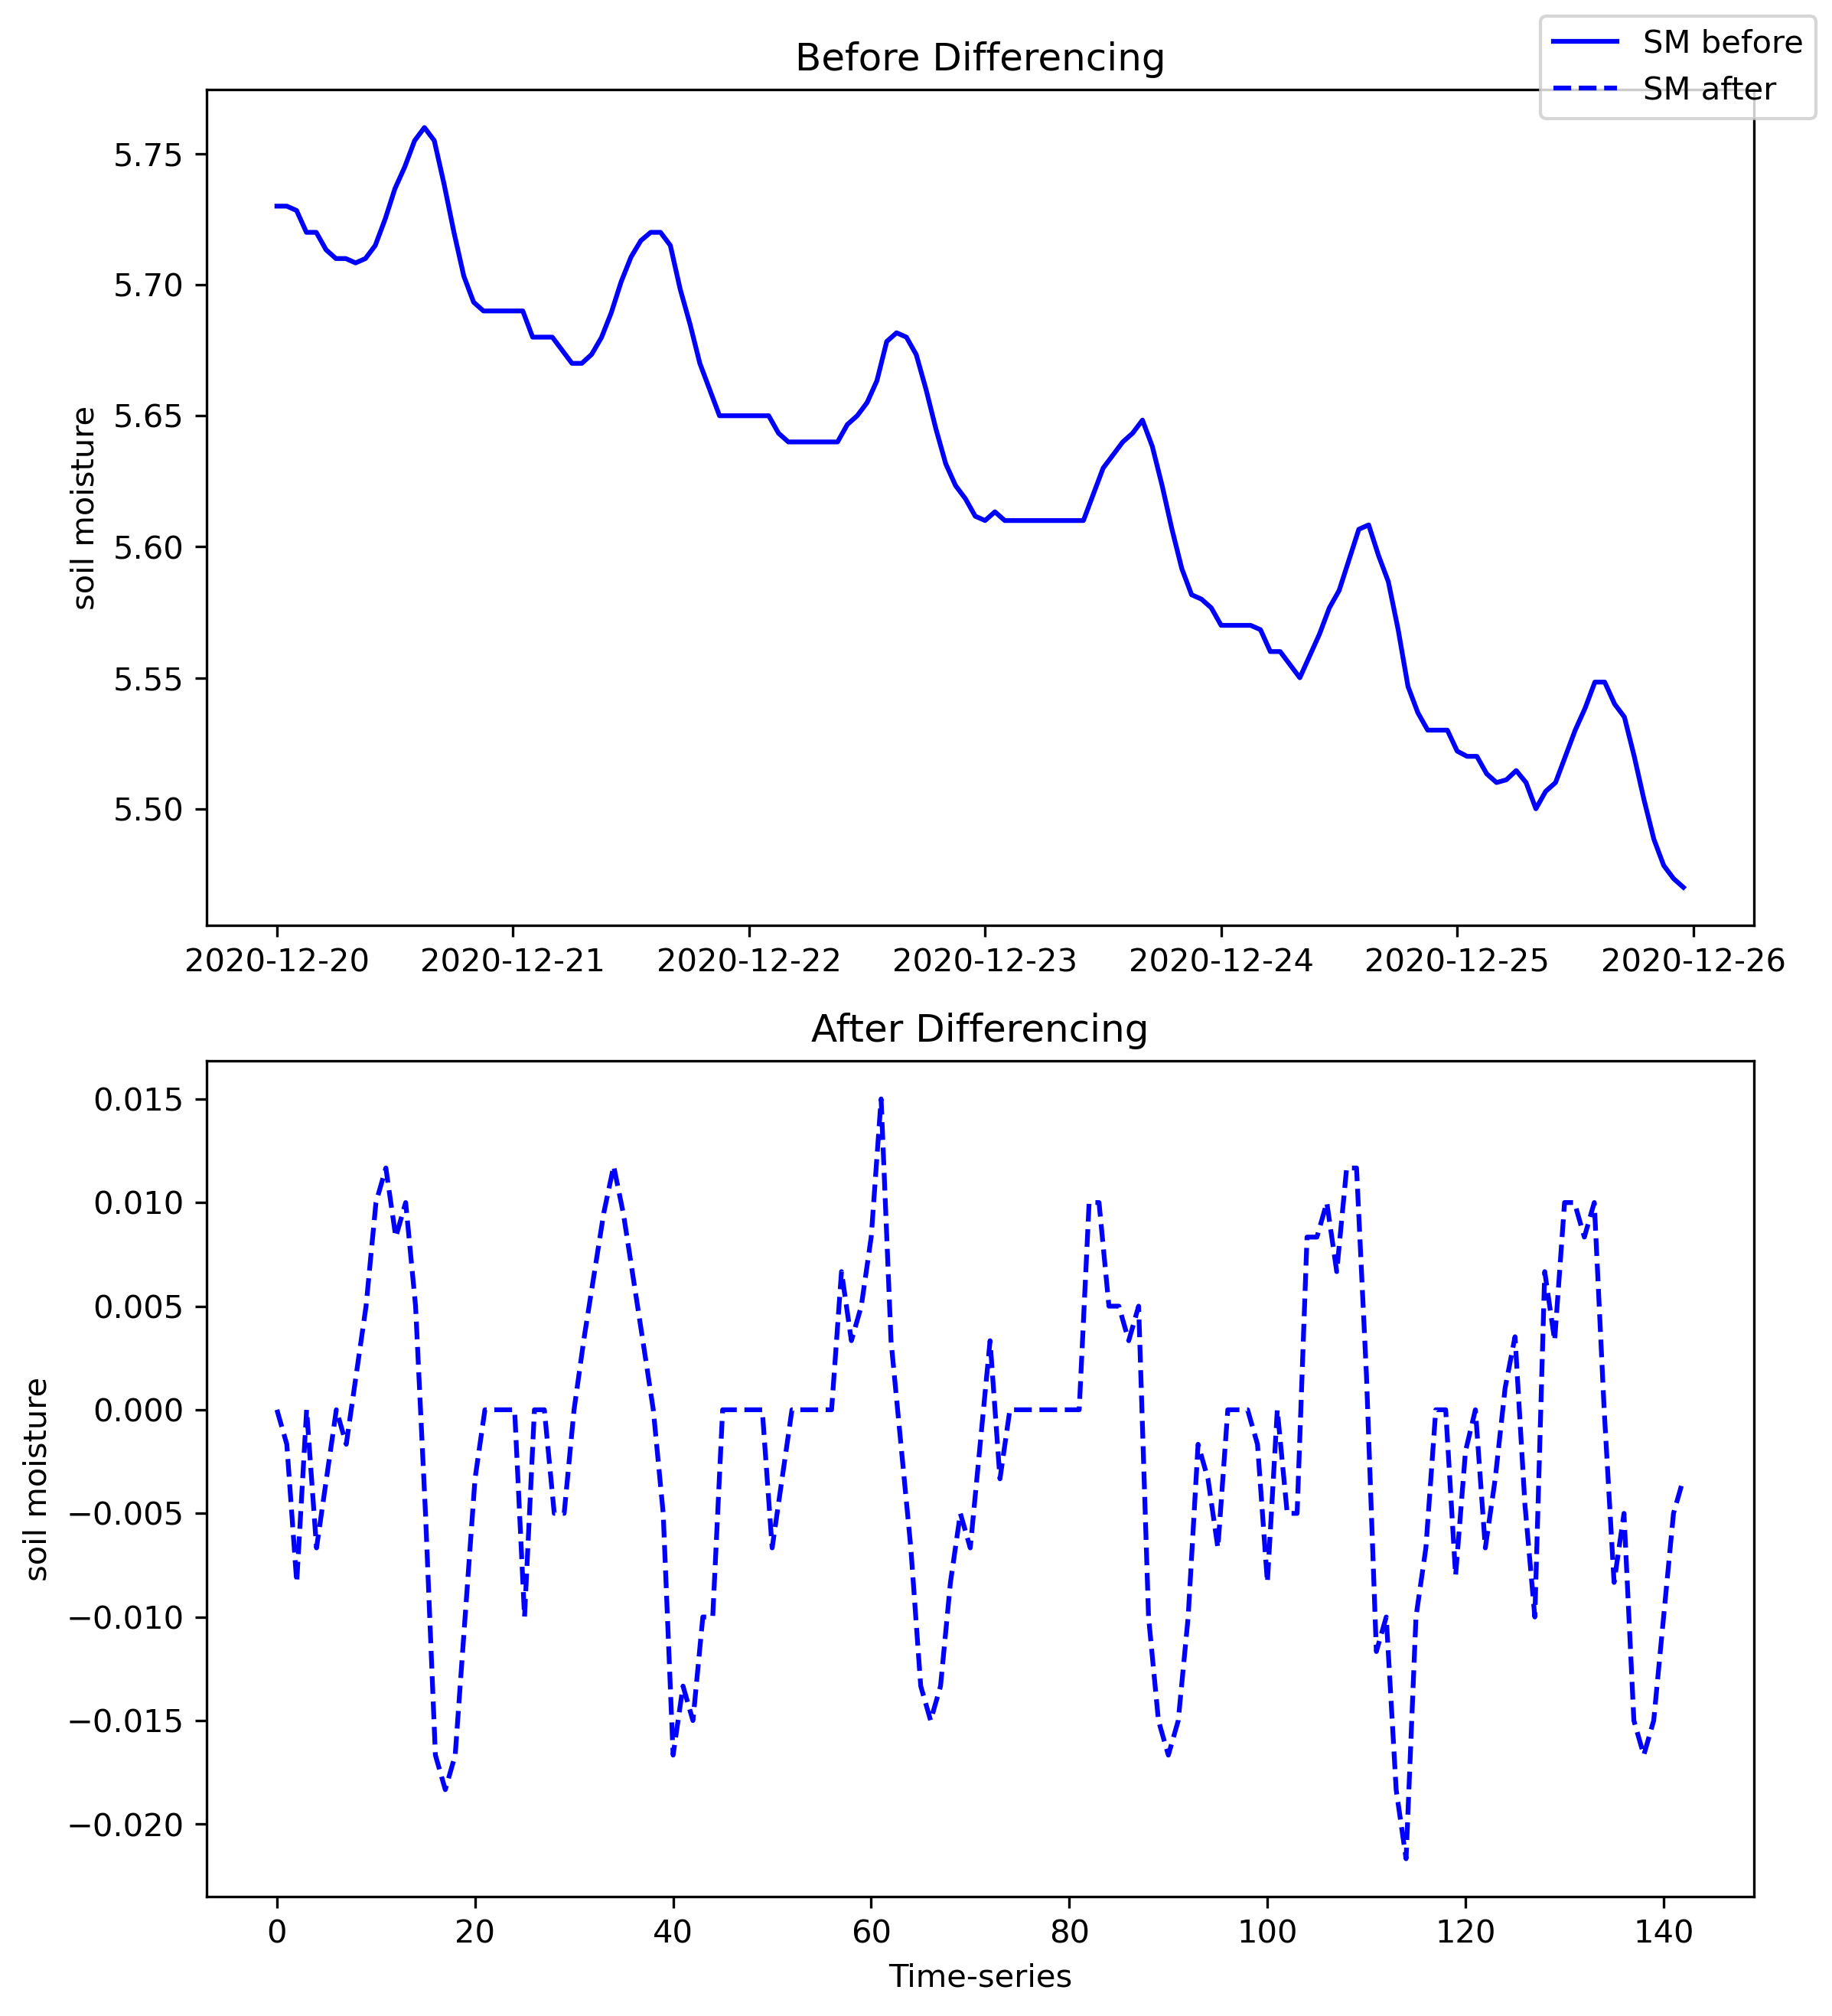

In [327]:
fig, ax = plt.subplots(2, 1, figsize = (4*2, 4*2.2), dpi = 300)

ax[0].plot(SM_sensor1, 'blue', label = 'SM before')
ax[1].plot(S1_SM_Diff, 'b--', label = 'SM after')
ax[0].set(title='Before Differencing', ylabel = 'soil moisture')
ax[1].set(title='After Differencing', ylabel = 'soil moisture')
ax[1].set_xlabel('Time-series')
plt.tight_layout()
fig.legend();

In [328]:
# # Differencing to make the Non-stationary time-series into stationaty

# # def differncing ():
# #     for i in 
# print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
# print('############ Sensor - 1 ############')
# S1_ST_Diff = np.diff(ST_sensor1)
# len(S1_ST_Diff)

# result_S1_ST = adfuller(S1_ST_Diff)
# print('ADF Statistics: %f' % result_S1_ST[0])
# print('p-value: %f' % result_S1_ST[1])
# print('Critical Values:')
# for key, value in result_S1_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S1_ST[0] < result_S1_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 5 ############')
# S5_ST_Diff = np.diff(ST_sensor5)
# len(S5_ST_Diff)

# result_S5_ST = adfuller(S5_ST_Diff)
# print('ADF Statistics: %f' % result_S5_ST[0])
# print('p-value: %f' % result_S5_ST[1])
# print('Critical Values:')
# for key, value in result_S5_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_ST[0] < result_S5_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 6 ############')
# S6_ST_Diff = np.diff(ST_sensor6)
# len(S6_ST_Diff)

# result_S6_ST = adfuller(S6_ST_Diff)
# print('ADF Statistics: %f' % result_S6_ST[0])
# print('p-value: %f' % result_S6_ST[1])
# print('Critical Values:')
# for key, value in result_S6_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S6_ST[0] < result_S6_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 7 ############')
# S7_ST_Diff = np.diff(ST_sensor7)
# len(S7_ST_Diff)

# result_S7_ST = adfuller(S7_ST_Diff)
# print('ADF Statistics: %f' % result_S7_ST[0])
# print('p-value: %f' % result_S7_ST[1])
# print('Critical Values:')
# for key, value in result_S7_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_ST[0] < result_S7_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 8 ############')
# S8_ST_Diff = np.diff(ST_sensor8)
# len(S8_ST_Diff)

# result_S8_ST = adfuller(S8_ST_Diff)
# print('ADF Statistics: %f' % result_S8_ST[0])
# print('p-value: %f' % result_S8_ST[1])
# print('Critical Values:')
# for key, value in result_S8_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S8_ST[0] < result_S8_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 9 ############')
# S9_ST_Diff = np.diff(ST_sensor9)
# len(S9_ST_Diff)

# result_S9_ST = adfuller(S9_ST_Diff)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# fig, ax = plt.subplots(3, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
# ax[0,0].set(title='S1', ylabel = 'soil temp.')

# ax[0,1].plot(S5_ST_Diff, 'green')
# ax[0,1].set(title='S5', ylabel = 'soil temp.')

# # ax[1,0].plot(S6_ST_Diff, 'green')
# # ax[1,0].set(title='S6', ylabel = 'soil temp.')

# # ax[1,1].plot(S7_ST_Diff, 'green')
# # ax[1,1].set(title='S7', ylabel = 'soil temp.')

# # ax[2,0].plot(S8_ST_Diff, 'green')
# # ax[2,0].set(title='S8', ylabel = 'soil temp.')

# # ax[2,1].plot(S9_ST_Diff, 'green')
# # ax[2,1].set(title='S9', ylabel = 'soil temp.')
# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

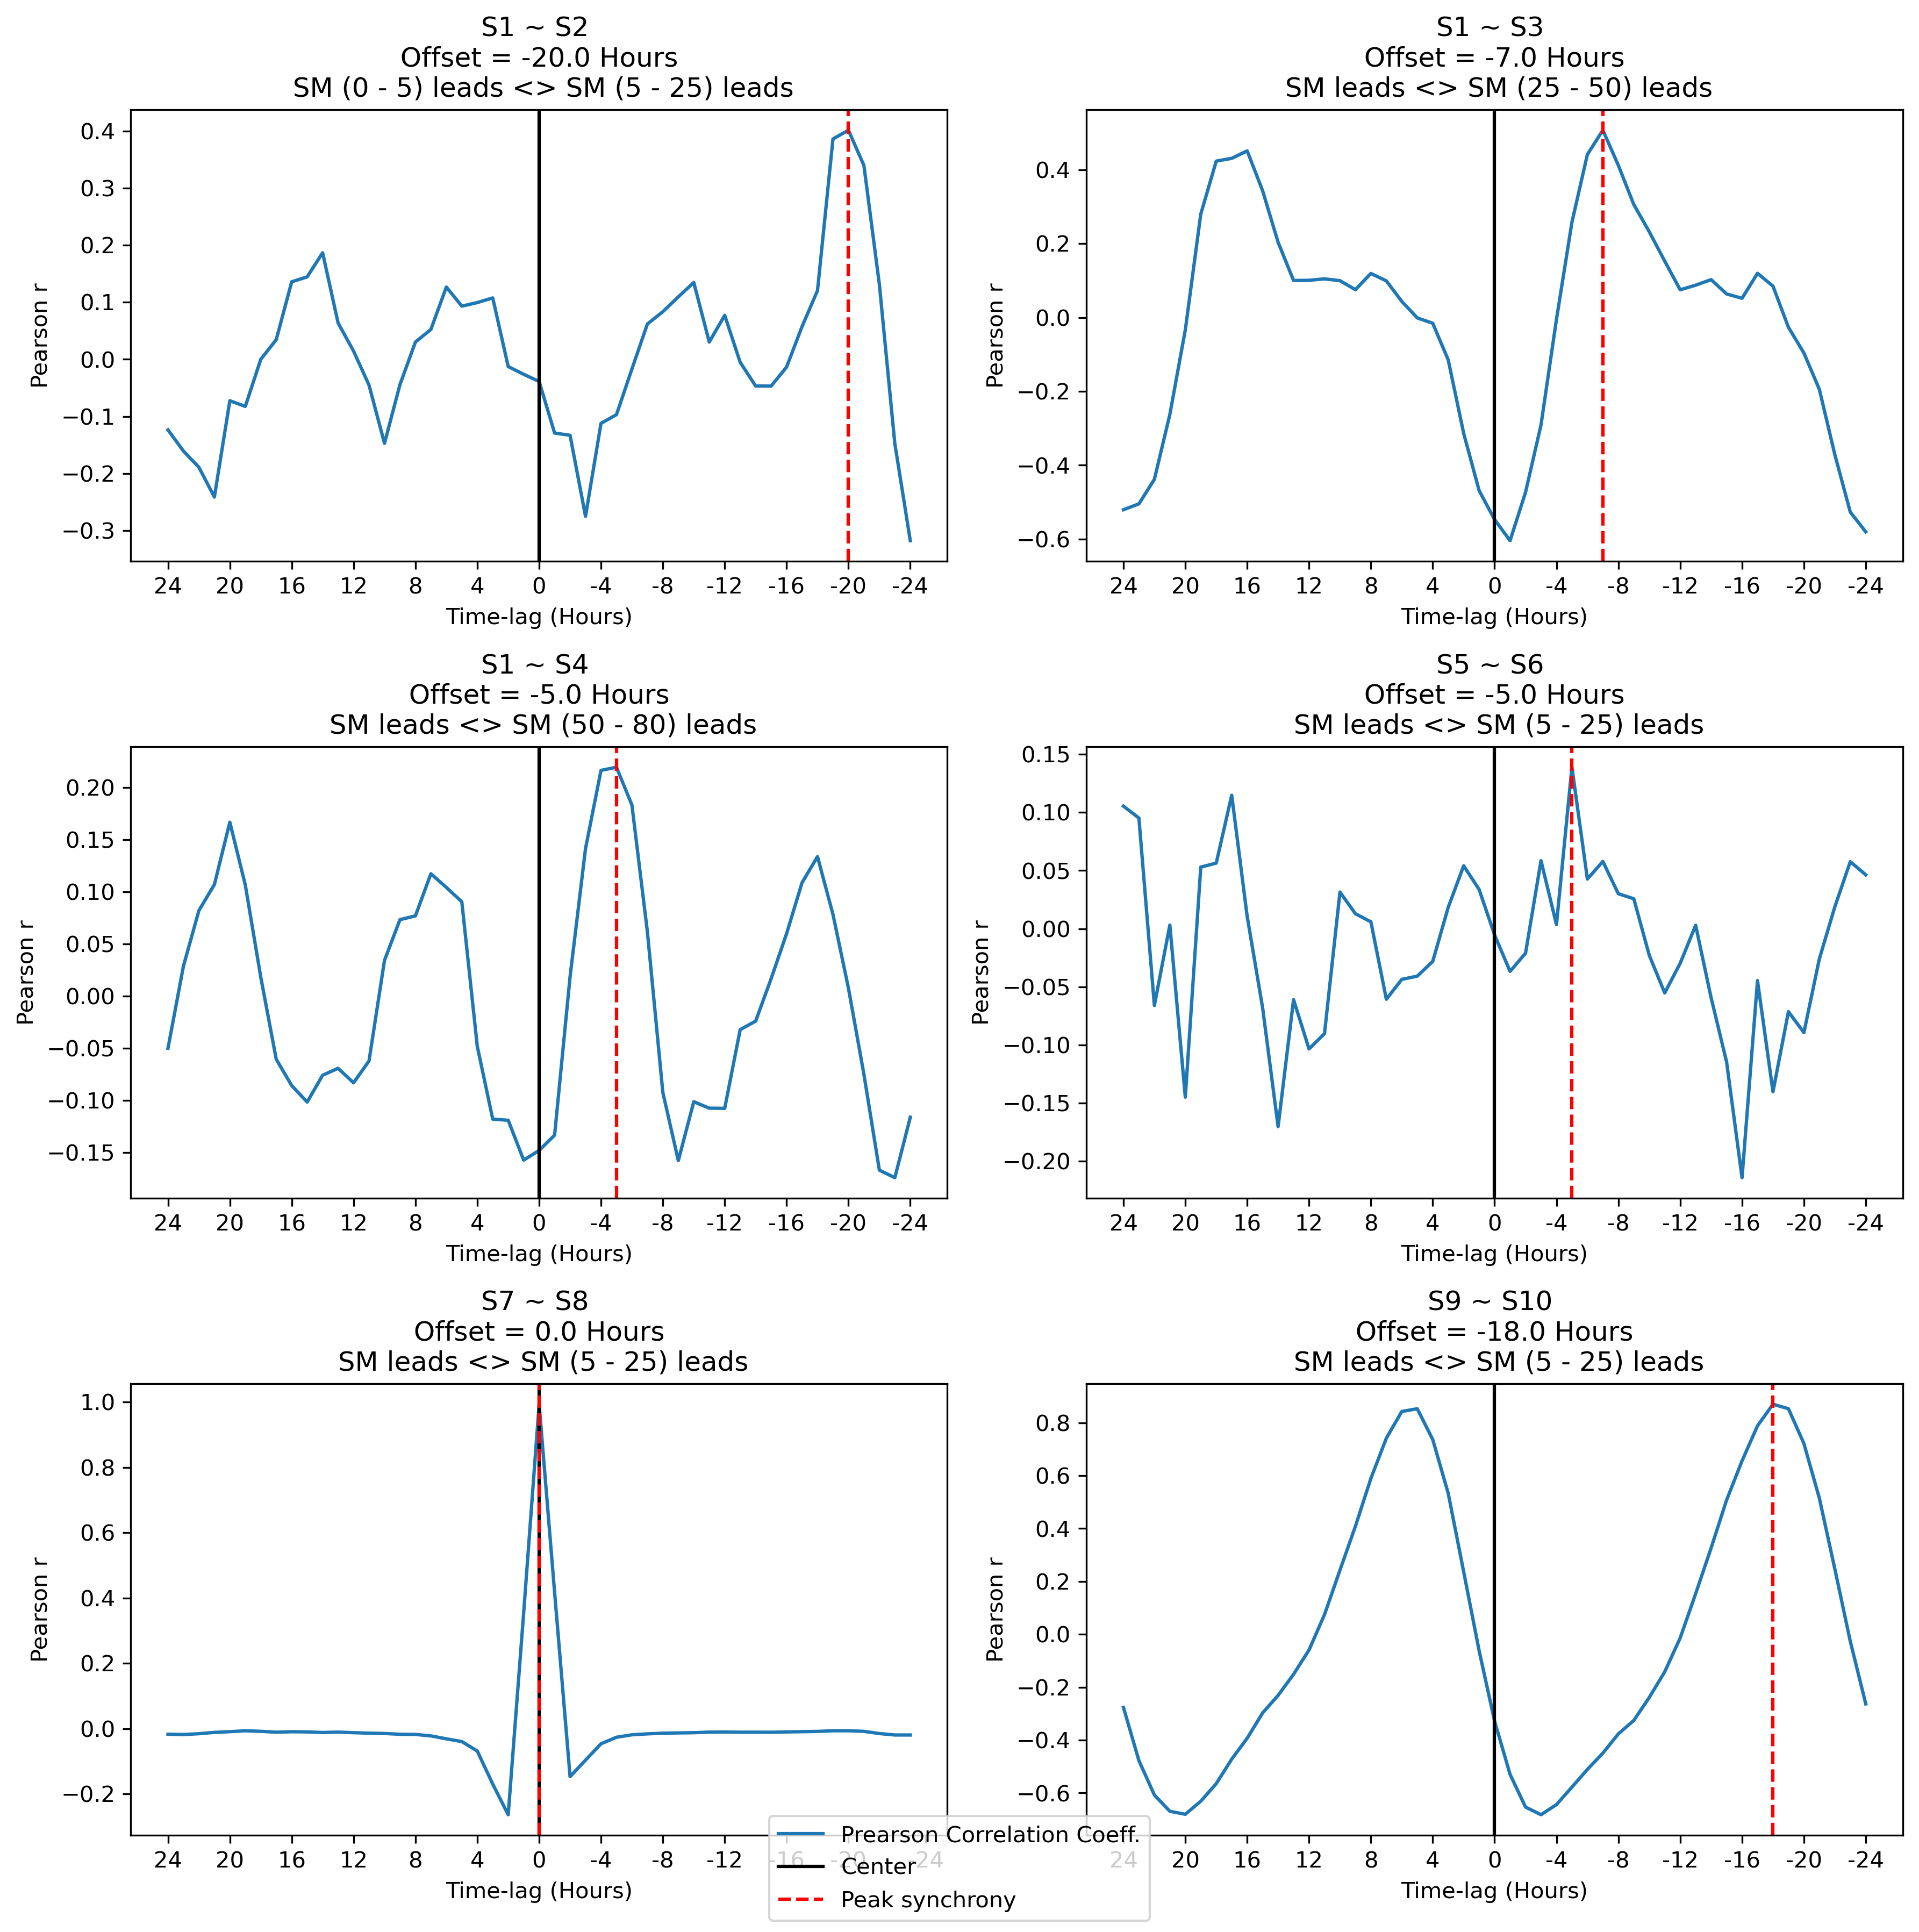

In [329]:
# Time lagged cross correlation

def crosscorr (datax, datay, lag=0, wrap = False):
    """
    Lag-N Cross correlaton.
    Shifted data filled with NaNs
    
    Parameters
    --------
    lag : int, default 0
    dataX, datay : pandas.Series objects of equal length
    
    
    Returns
    --------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))
    
S1_d1 = pd.Series(S1_SM_Diff)
S2_d1 = pd.Series(S2_SM_Diff)
S3_d1 = pd.Series(S3_SM_Diff)
S4_d1 = pd.Series(S4_SM_Diff)
# S5_d1 = pd.Series(S5_SM_Diff)
# S6_d1 = pd.Series(S6_SM_Diff)
# S7_d1 = pd.Series(S7_SM_Diff)
# S8_d1 = pd.Series(S8_SM_Diff)
# # S9_d1 = pd.Series(S9_SM_Diff)
# S10_d1 = pd.Series(S10_SM_Diff)

# S1_d1 = pd.Series(SM_sensor1)
# S2_d1 = pd.Series(SM_sensor2)
# S3_d1 = pd.Series(SM_sensor3)
# S4_d1 = pd.Series(SM_sensor4)
# S5_d1 = pd.Series(SM_sensor5)
# S6_d1 = pd.Series(SM_sensor6)
# S7_d1 = pd.Series(SM_sensor7)
# S8_d1 = pd.Series(SM_sensor8)
# S9_d1 = pd.Series(SM_sensor9)
# S10_d1 = pd.Series(SM_sensor10)



S1S2_rs = [crosscorr(S1_d1, S2_d1, lag) for lag in range(-24, 25)]
S1S3_rs = [crosscorr(S1_d1, S3_d1, lag) for lag in range(-24, 25)]
S1S4_rs = [crosscorr(S1_d1, S4_d1, lag) for lag in range(-24, 25)]
S5S6_rs = [crosscorr(S5_d1, S6_d1, lag) for lag in range(-24, 25)]
S7S8_rs = [crosscorr(S7_d1, S8_d1, lag) for lag in range(-24, 25)]
# S9S10_rs = [crosscorr(S9_d1, S10_d1, lag) for lag in range(-24, 25)]

S1S2_offset = np.floor(len(S1S2_rs)/2)-np.argmax(S1S2_rs)
S1S3_offset = np.floor(len(S1S3_rs)/2)-np.argmax(S1S3_rs)
S1S4_offset = np.floor(len(S1S4_rs)/2)-np.argmax(S1S4_rs)
S5S6_offset = np.floor(len(S5S6_rs)/2)-np.argmax(S5S6_rs)
S7S8_offset = np.floor(len(S7S8_rs)/2)-np.argmax(S7S8_rs)
# S9S10_offset = np.floor(len(S9S10_rs)/2)-np.argmax(S9S10_rs)


fig, ax = plt.subplots(3,2, figsize = (12, 12), dpi = 300)
ax[0,0].plot(S1S2_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(S1S2_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(S1S2_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S1 ~ S2 \n Offset = {S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(S1S3_rs)
ax[0,1].axvline(np.floor(len(S1S3_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(S1S3_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S1 ~ S3 \n Offset = {S1S3_offset} Hours \n SM leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(S1S4_rs)
ax[1,0].axvline(np.floor(len(S1S4_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(S1S4_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S1 ~ S4 \n Offset = {S1S4_offset} Hours \n SM leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,1].plot(S5S6_rs)
ax[1,1].axvline(np.floor(len(S5S6_rs)/2), color = 'k', linestyle='-')
ax[1,1].axvline(np.argmax(S5S6_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S5 ~ S6 \n Offset = {S5S6_offset} Hours \n SM leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[2,0].plot(S7S8_rs, label = '')
ax[2,0].axvline(np.floor(len(S7S8_rs)/2), color = 'k', linestyle='-')
ax[2,0].axvline(np.argmax(S7S8_rs), color='r', linestyle='--')
ax[2,0].set(title=f'S7 ~ S8 \n Offset = {S7S8_offset} Hours \n SM leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[2,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 49])
ax[2,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[2,1].plot(S9S10_rs)
ax[2,1].axvline(np.floor(len(S9S10_rs)/2), color = 'k', linestyle='-')
ax[2,1].axvline(np.argmax(S9S10_rs), color='r', linestyle='--')
ax[2,1].set(title=f'S9 ~ S10 \n Offset = {S9S10_offset} Hours \n SM leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[2,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[2,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'lower center');

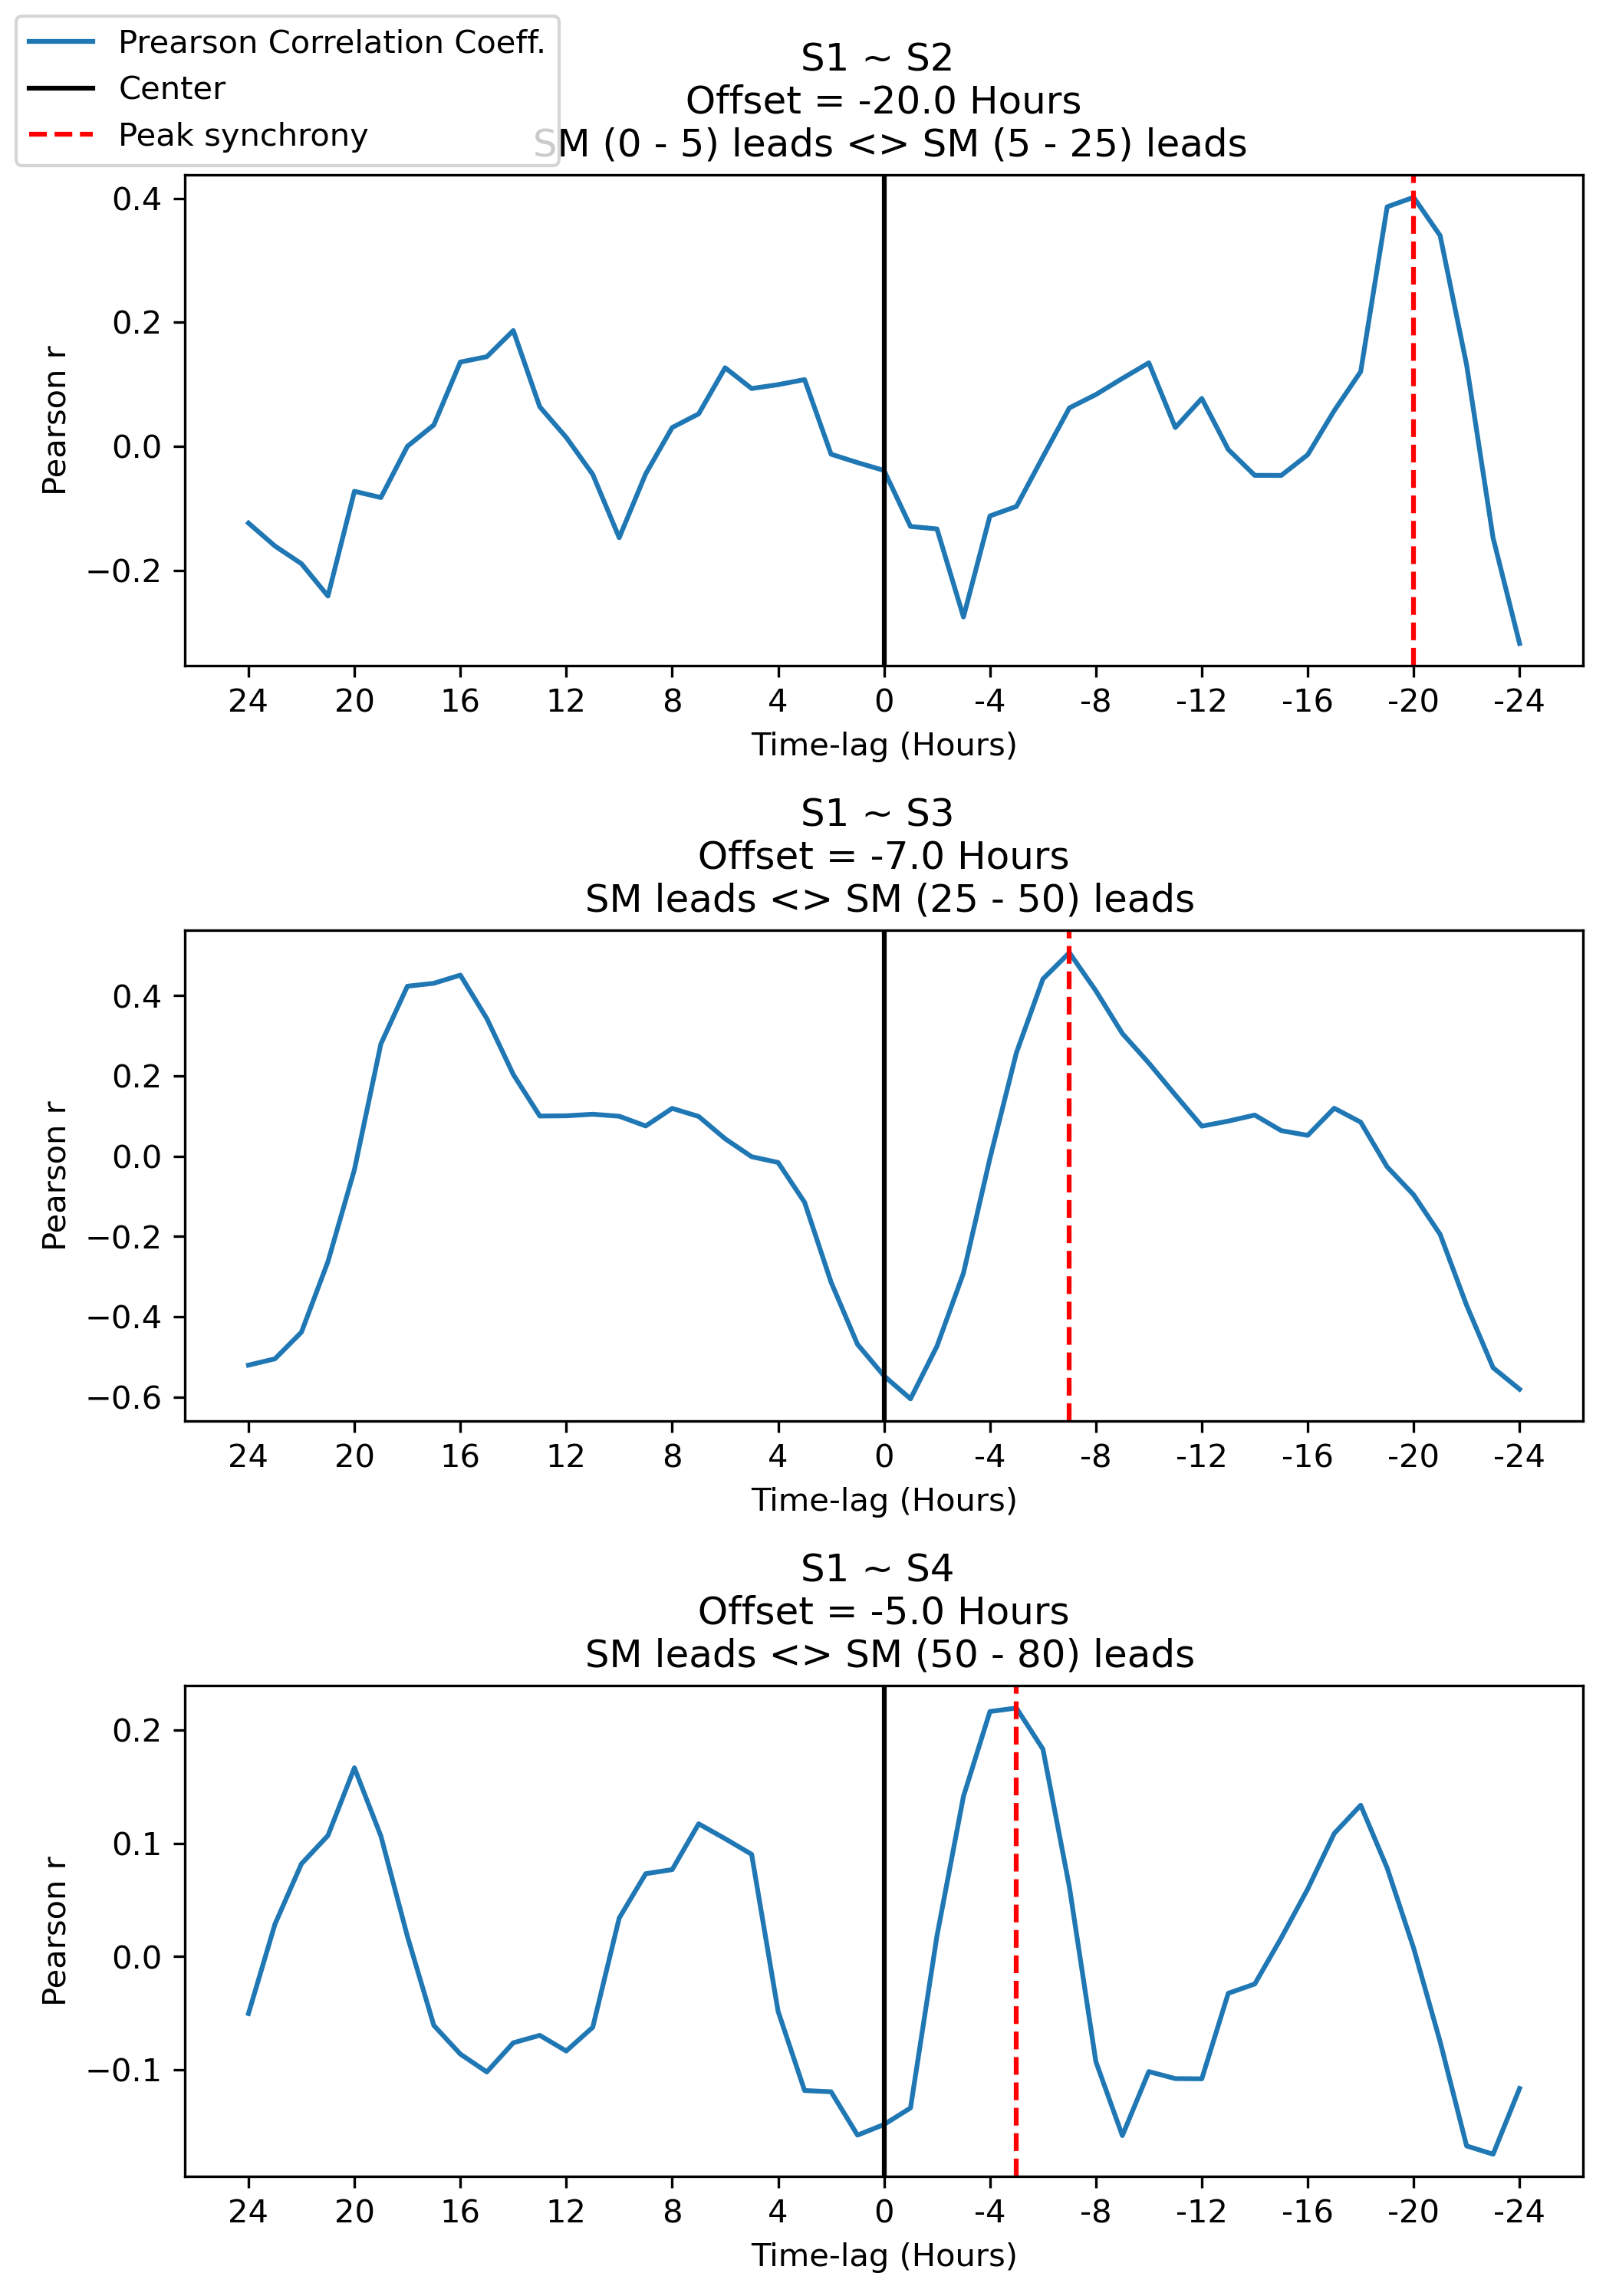

In [330]:
fig, ax = plt.subplots(3,1, figsize = (7, 10), dpi = 300)
ax[0].plot(S1S2_rs, label = 'Prearson Correlation Coeff.')
ax[0].axvline(np.floor(len(S1S2_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0].axvline(np.argmax(S1S2_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0].set(title=f'S11 ~ S12 \n Offset = {S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1].plot(S1S3_rs)
ax[1].axvline(np.floor(len(S1S3_rs)/2), color = 'k', linestyle='-')
ax[1].axvline(np.argmax(S1S3_rs), color='r', linestyle='--')
ax[1].set(title=f'S11 ~ S13 \n Offset = {S1S3_offset} Hours \n SM leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[2].plot(S1S4_rs)
ax[2].axvline(np.floor(len(S1S4_rs)/2), color = 'k', linestyle='-')
ax[2].axvline(np.argmax(S1S4_rs), color='r', linestyle='--')
ax[2].set(title=f'S11 ~ S14 \n Offset = {S1S4_offset} Hours \n SM leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[2].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[2].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
fig.legend(loc = 'upper left')
plt.tight_layout();
# handles, labels = fig.get_legend_handles_labels();

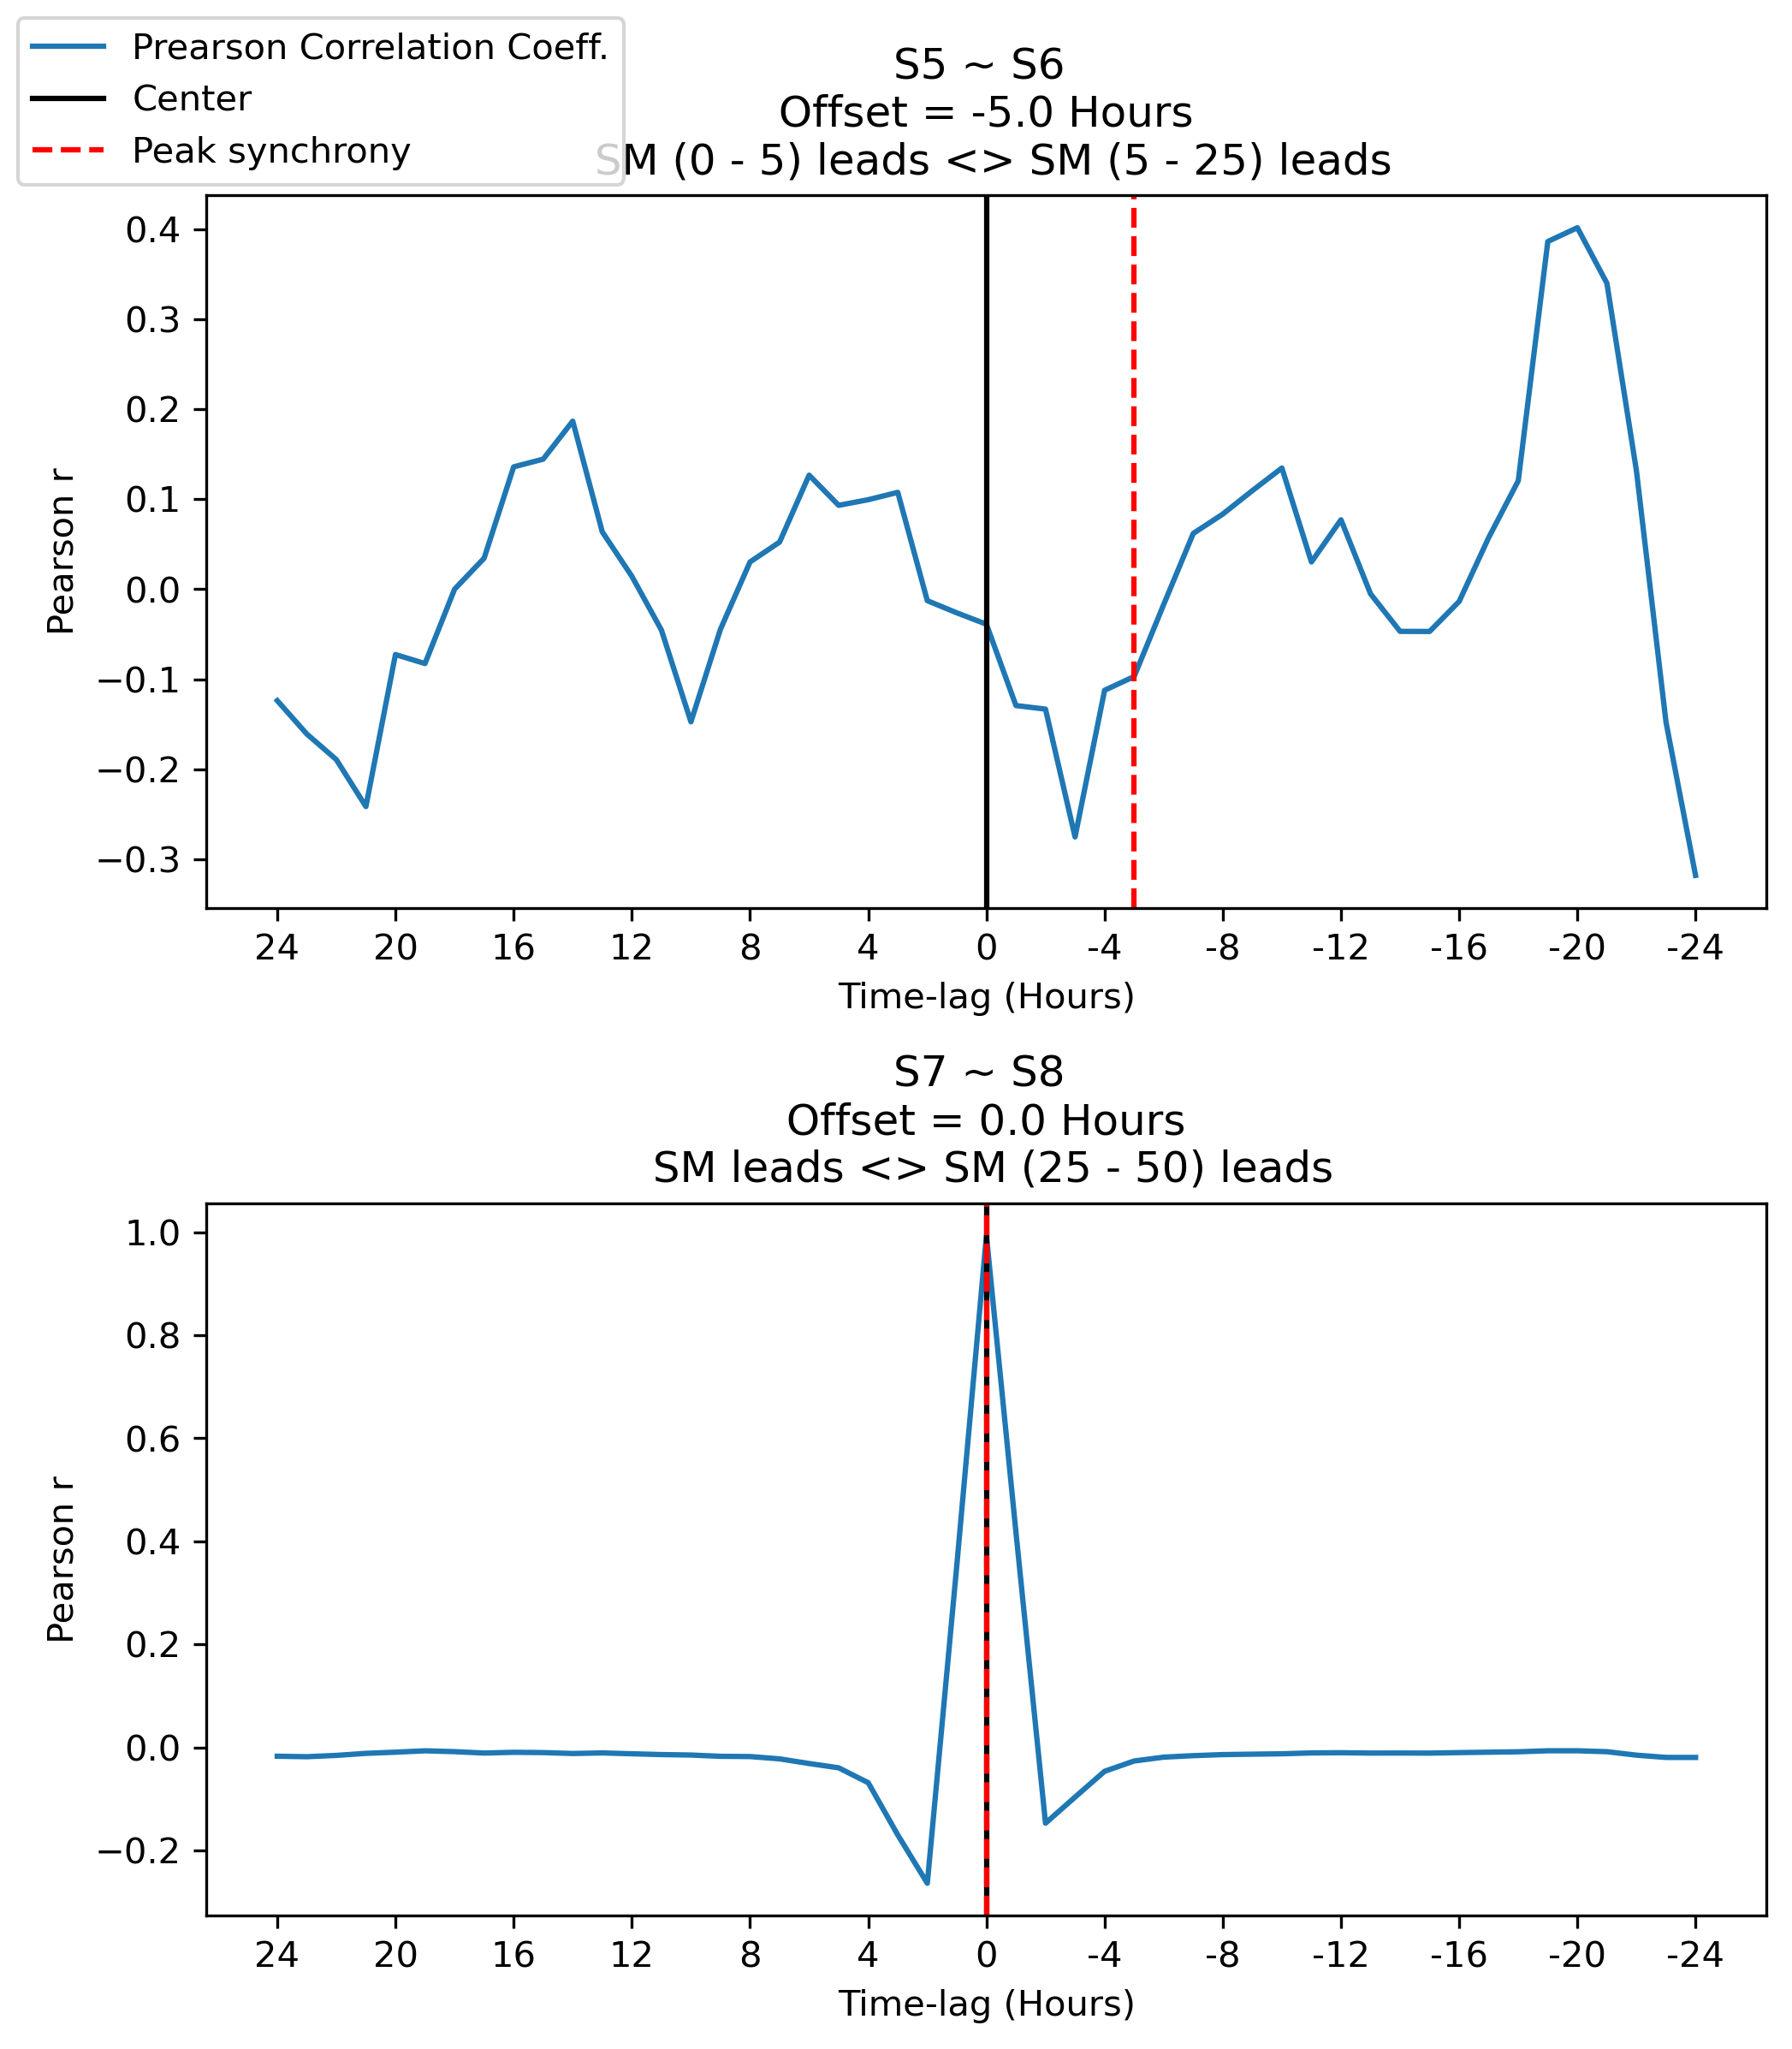

In [331]:
fig, ax = plt.subplots(2,1, figsize = (7, 8), dpi = 300)
ax[0].plot(S1S2_rs, label = 'Prearson Correlation Coeff.')
ax[0].axvline(np.floor(len(S5S6_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0].axvline(np.argmax(S5S6_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0].set(title=f'S5 ~ S6 \n Offset = {S5S6_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1].plot(S7S8_rs)
ax[1].axvline(np.floor(len(S7S8_rs)/2), color = 'k', linestyle='-')
ax[1].axvline(np.argmax(S7S8_rs), color='r', linestyle='--')
ax[1].set(title=f'S7 ~ S8 \n Offset = {S7S8_offset} Hours \n SM leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
fig.legend(loc = 'upper left')
plt.tight_layout();

In [332]:
print('Maximum r values')
print('Sensor-1 ~ 2 max. rs value:', np.max(S1S2_rs))
print('Sensor-1 ~ 3 max. rs value:', np.max(S1S3_rs))
print('Sensor-1 ~ 4 max. rs value:', np.max(S1S4_rs))
print('Sensor-5 ~ 6 max. rs value:', np.max(S5S6_rs))
print('Sensor-7 ~ 8 max. rs value:', np.max(S7S8_rs))
# print('Sensor-9 ~ 10 max. rs value:', np.max(S9S10_rs))


# print('\n \n Maximum Time-lag')
# print('Sensor-1 max. rs value:', (np.argmax(S1_rs)) - 24)
# print('Sensor-5 max. rs value:', (np.argmax(S5_rs)) - 24)
# print('Sensor-6 max. rs value:', (np.argmax(S6_rs)) - 24)
# print('Sensor-7 max. rs value:', (np.argmax(S7_rs)) - 24)
# print('Sensor-8 max. rs value:', (np.argmax(S8_rs)) - 24)
# print('Sensor-9 max. rs value:', (np.argmax(S9_rs)) - 24)

Maximum r values
Sensor-1 ~ 2 max. rs value: 0.4015029882772288
Sensor-1 ~ 3 max. rs value: 0.5074024553227987
Sensor-1 ~ 4 max. rs value: 0.21939068381123583
Sensor-5 ~ 6 max. rs value: 0.13888295462431713
Sensor-7 ~ 8 max. rs value: 0.9933316780821049


In [333]:
# PreMon_S1S2_rs = S1S2_rs
# PreMon_S1S3_rs = S1S3_rs
# PreMon_S1S4_rs = S1S4_rs

# Mon_S1S2_rs = S1S2_rs
# Mon_S1S3_rs = S1S3_rs
# Mon_S1S4_rs = S1S4_rs

# PostMon_S1S2_rs = S1S2_rs
# PostMon_S1S3_rs = S1S3_rs
# PostMon_S1S4_rs = S1S4_rs

Winter_S1S2_rs = S1S2_rs
Winter_S1S3_rs = S1S3_rs
Winter_S1S4_rs = S1S4_rs



In [334]:
# # Pre - monsoon
# PreMon_S1S2_offset = S1S2_offset
# PreMon_S1S3_offset = S1S3_offset
# PreMon_S1S4_offset = S1S4_offset

# # Monsoon
# Mon_S1S2_offset = S1S2_offset
# Mon_S1S3_offset = S1S3_offset
# Mon_S1S4_offset = S1S4_offset

# # Post - monsoon
# PostMon_S1S2_offset = S1S2_offset
# PostMon_S1S3_offset = S1S3_offset
# PostMon_S1S4_offset = S1S4_offset

# Winter
Winter_S1S2_offset = S1S2_offset
Winter_S1S3_offset = S1S3_offset
Winter_S1S4_offset = S1S4_offset

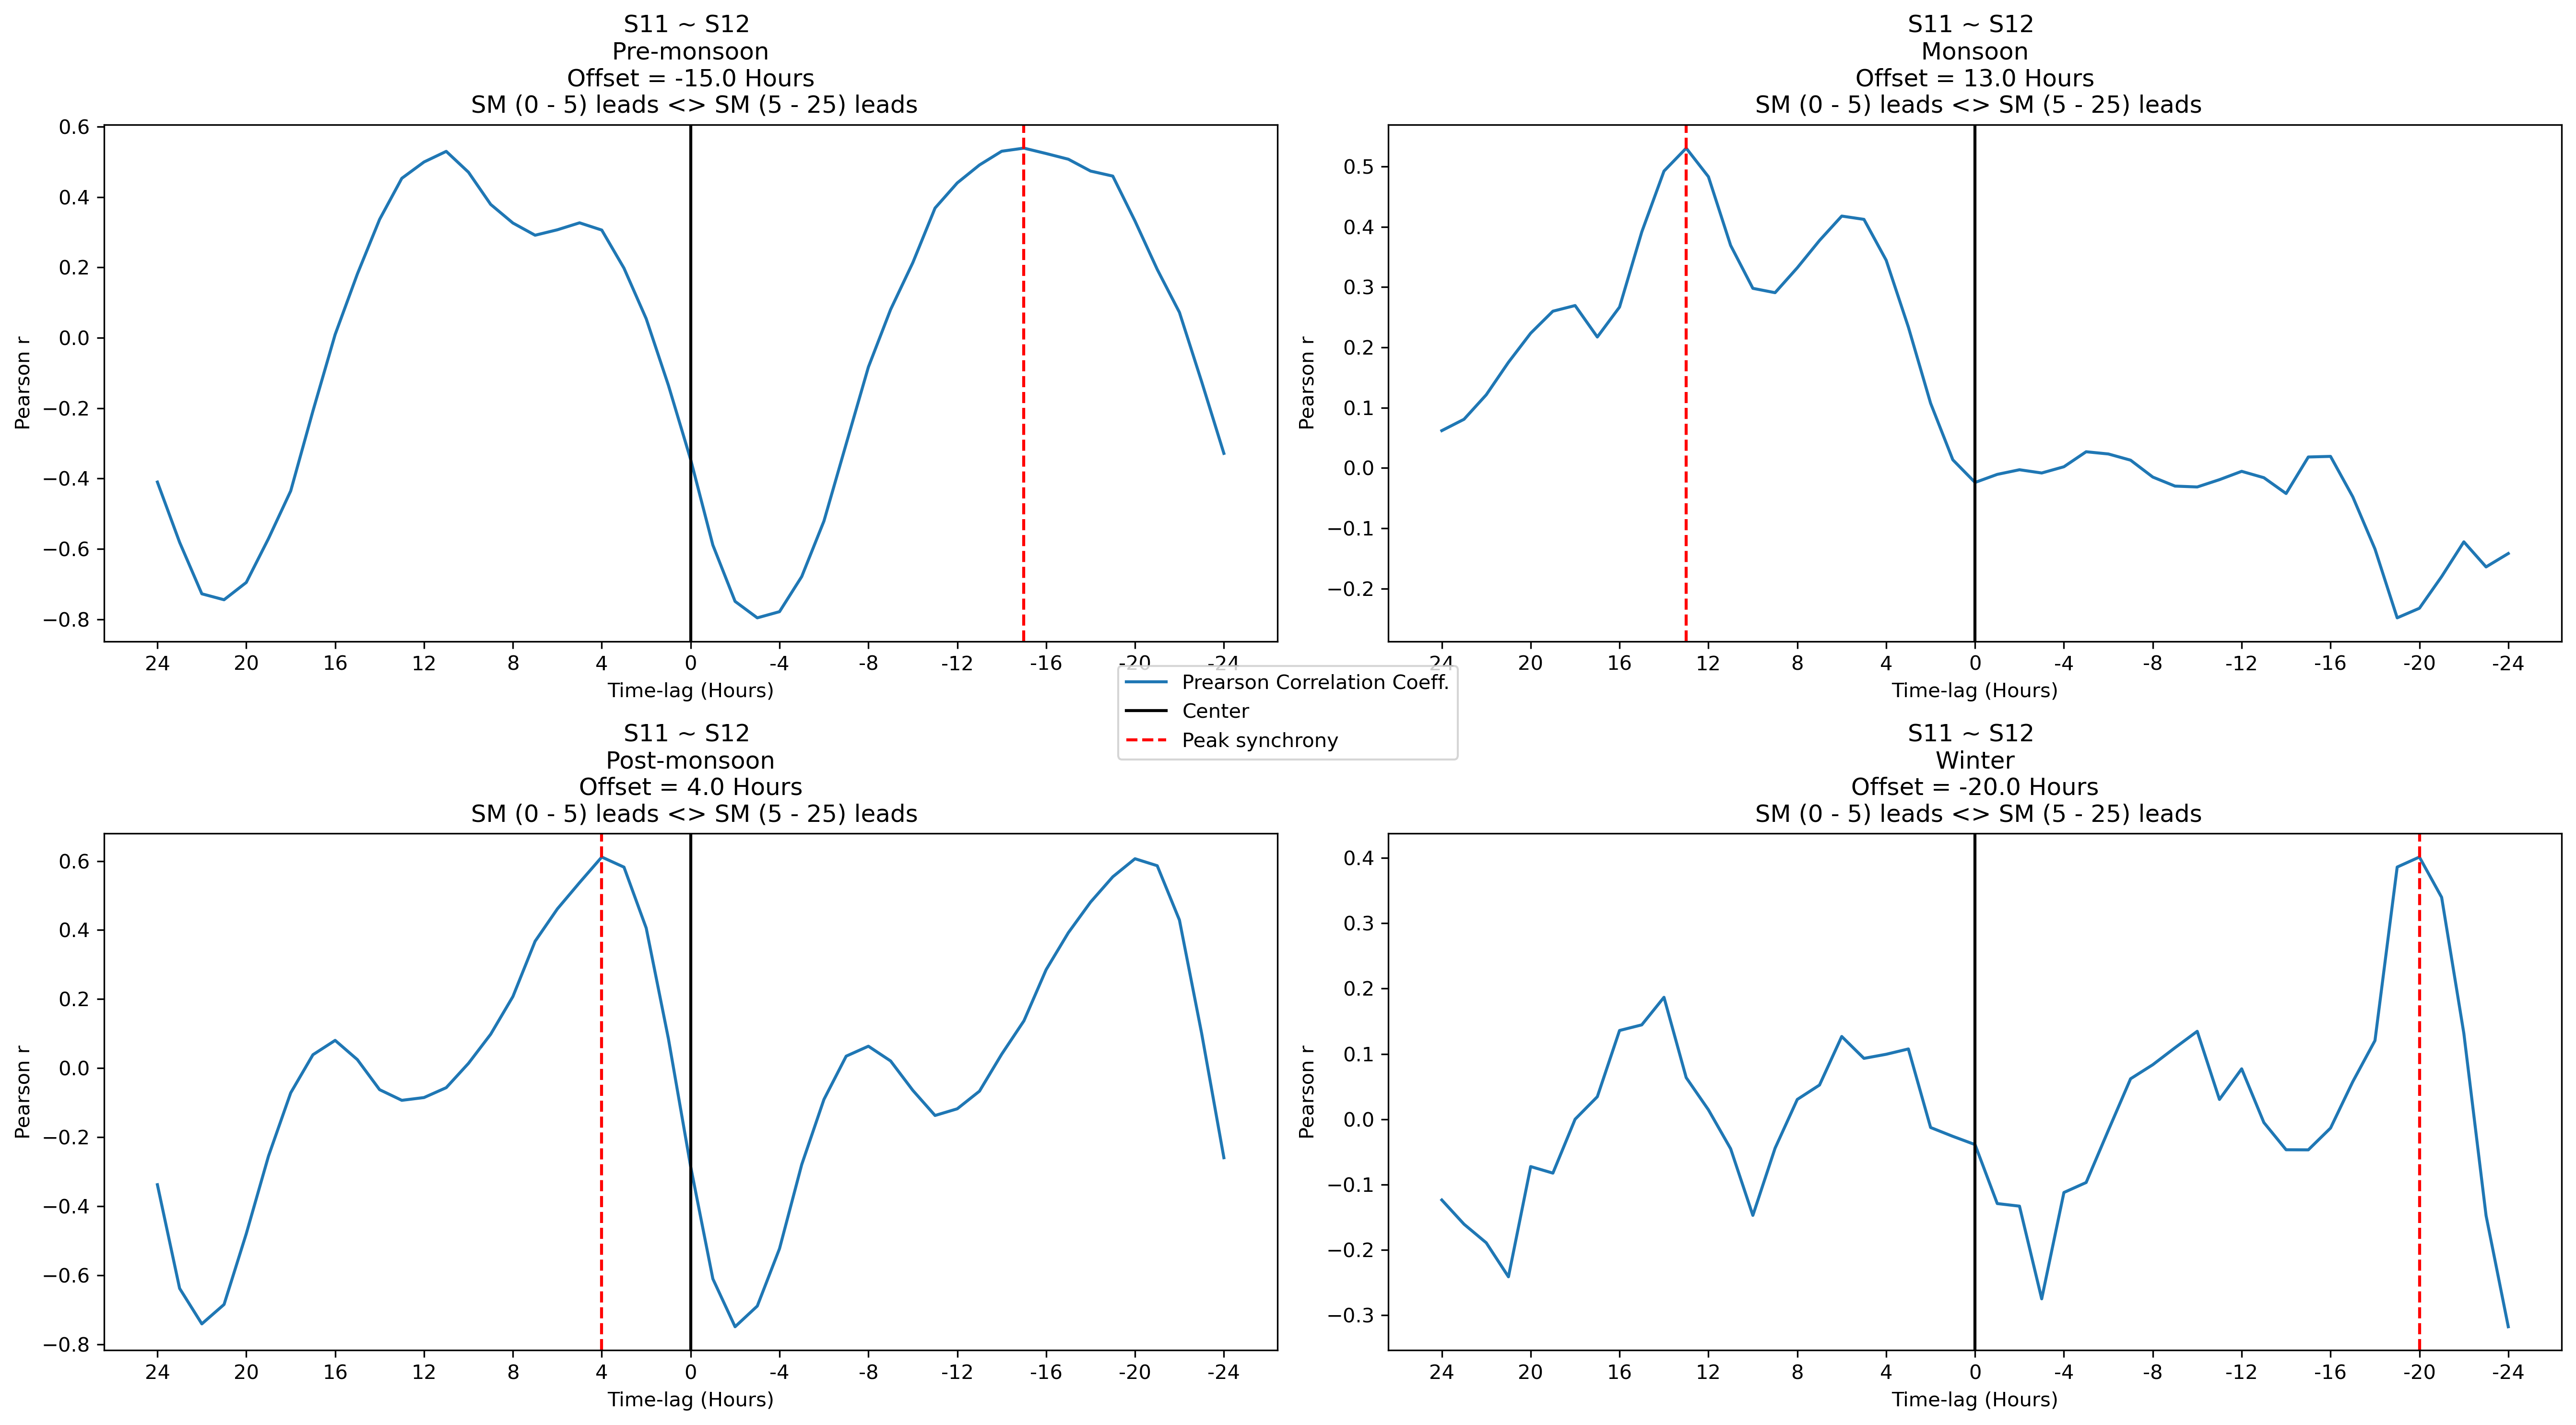

In [342]:
fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(PreMon_S1S2_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(PreMon_S1S2_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(PreMon_S1S2_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S11 ~ S12 \n Pre-monsoon \n Offset = {PreMon_S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(Mon_S1S2_rs)
ax[0,1].axvline(np.floor(len(Mon_S1S2_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(Mon_S1S2_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S11 ~ S12 \n Monsoon \n Offset = {Mon_S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(PostMon_S1S2_rs)
ax[1,0].axvline(np.floor(len(PostMon_S1S2_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(PostMon_S1S2_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S11 ~ S12 \n Post-monsoon \n Offset = {PostMon_S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,1].plot(Winter_S1S2_rs)
ax[1,1].axvline(np.floor(len(Winter_S1S2_rs)/2), color = 'k', linestyle='-')
ax[1,1].axvline(np.argmax(Winter_S1S2_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S11 ~ S12 \n Winter \n Offset = {Winter_S1S2_offset} Hours \n SM (0 - 5) leads <> SM (5 - 25) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'center');

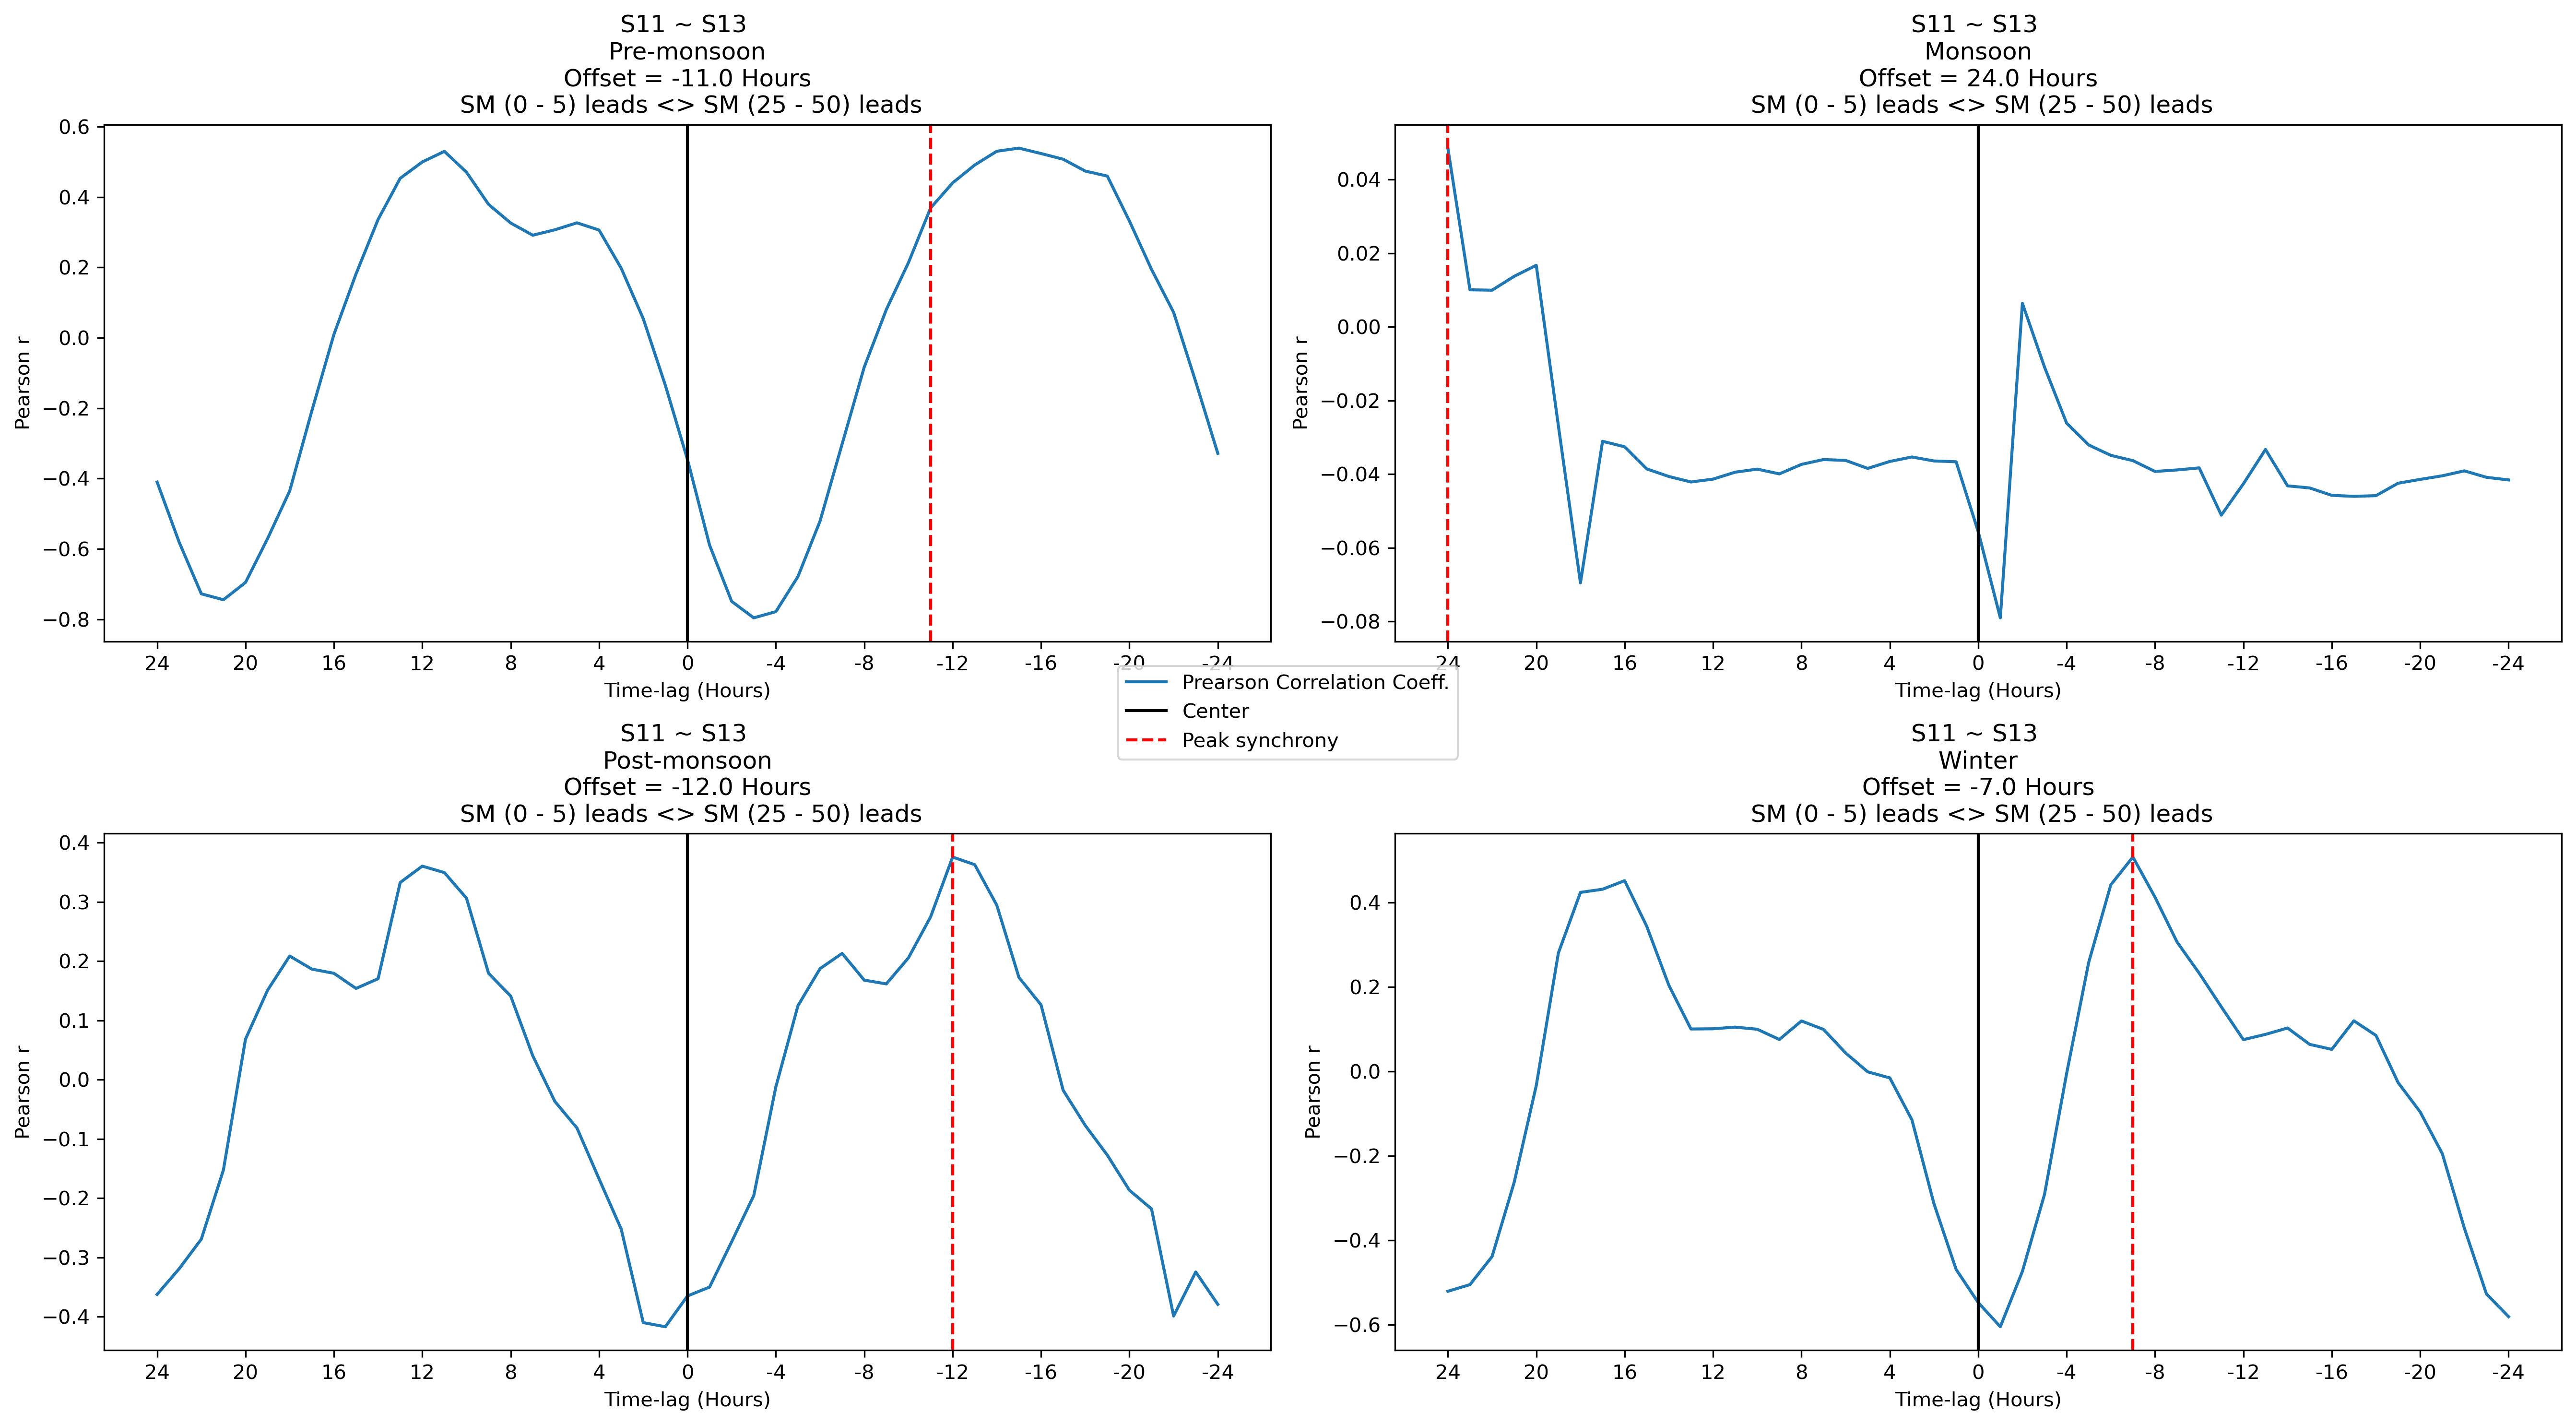

In [343]:
fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(PreMon_S1S2_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(PreMon_S1S3_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(PreMon_S1S3_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S11 ~ S13 \n Pre-monsoon \n Offset = {PreMon_S1S3_offset} Hours \n SM (0 - 5) leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(Mon_S1S3_rs)
ax[0,1].axvline(np.floor(len(Mon_S1S3_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(Mon_S1S3_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S11 ~ S13 \n Monsoon \n Offset = {Mon_S1S3_offset} Hours \n SM (0 - 5) leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(PostMon_S1S3_rs)
ax[1,0].axvline(np.floor(len(PostMon_S1S3_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(PostMon_S1S3_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S11 ~ S13 \n Post-monsoon \n Offset = {PostMon_S1S3_offset} Hours \n SM (0 - 5) leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,1].plot(Winter_S1S3_rs)
ax[1,1].axvline(np.floor(len(Winter_S1S3_rs)/2), color = 'k', linestyle='-')
ax[1,1].axvline(np.argmax(Winter_S1S3_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S11 ~ S13 \n Winter \n Offset = {Winter_S1S3_offset} Hours \n SM (0 - 5) leads <> SM (25 - 50) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'center');

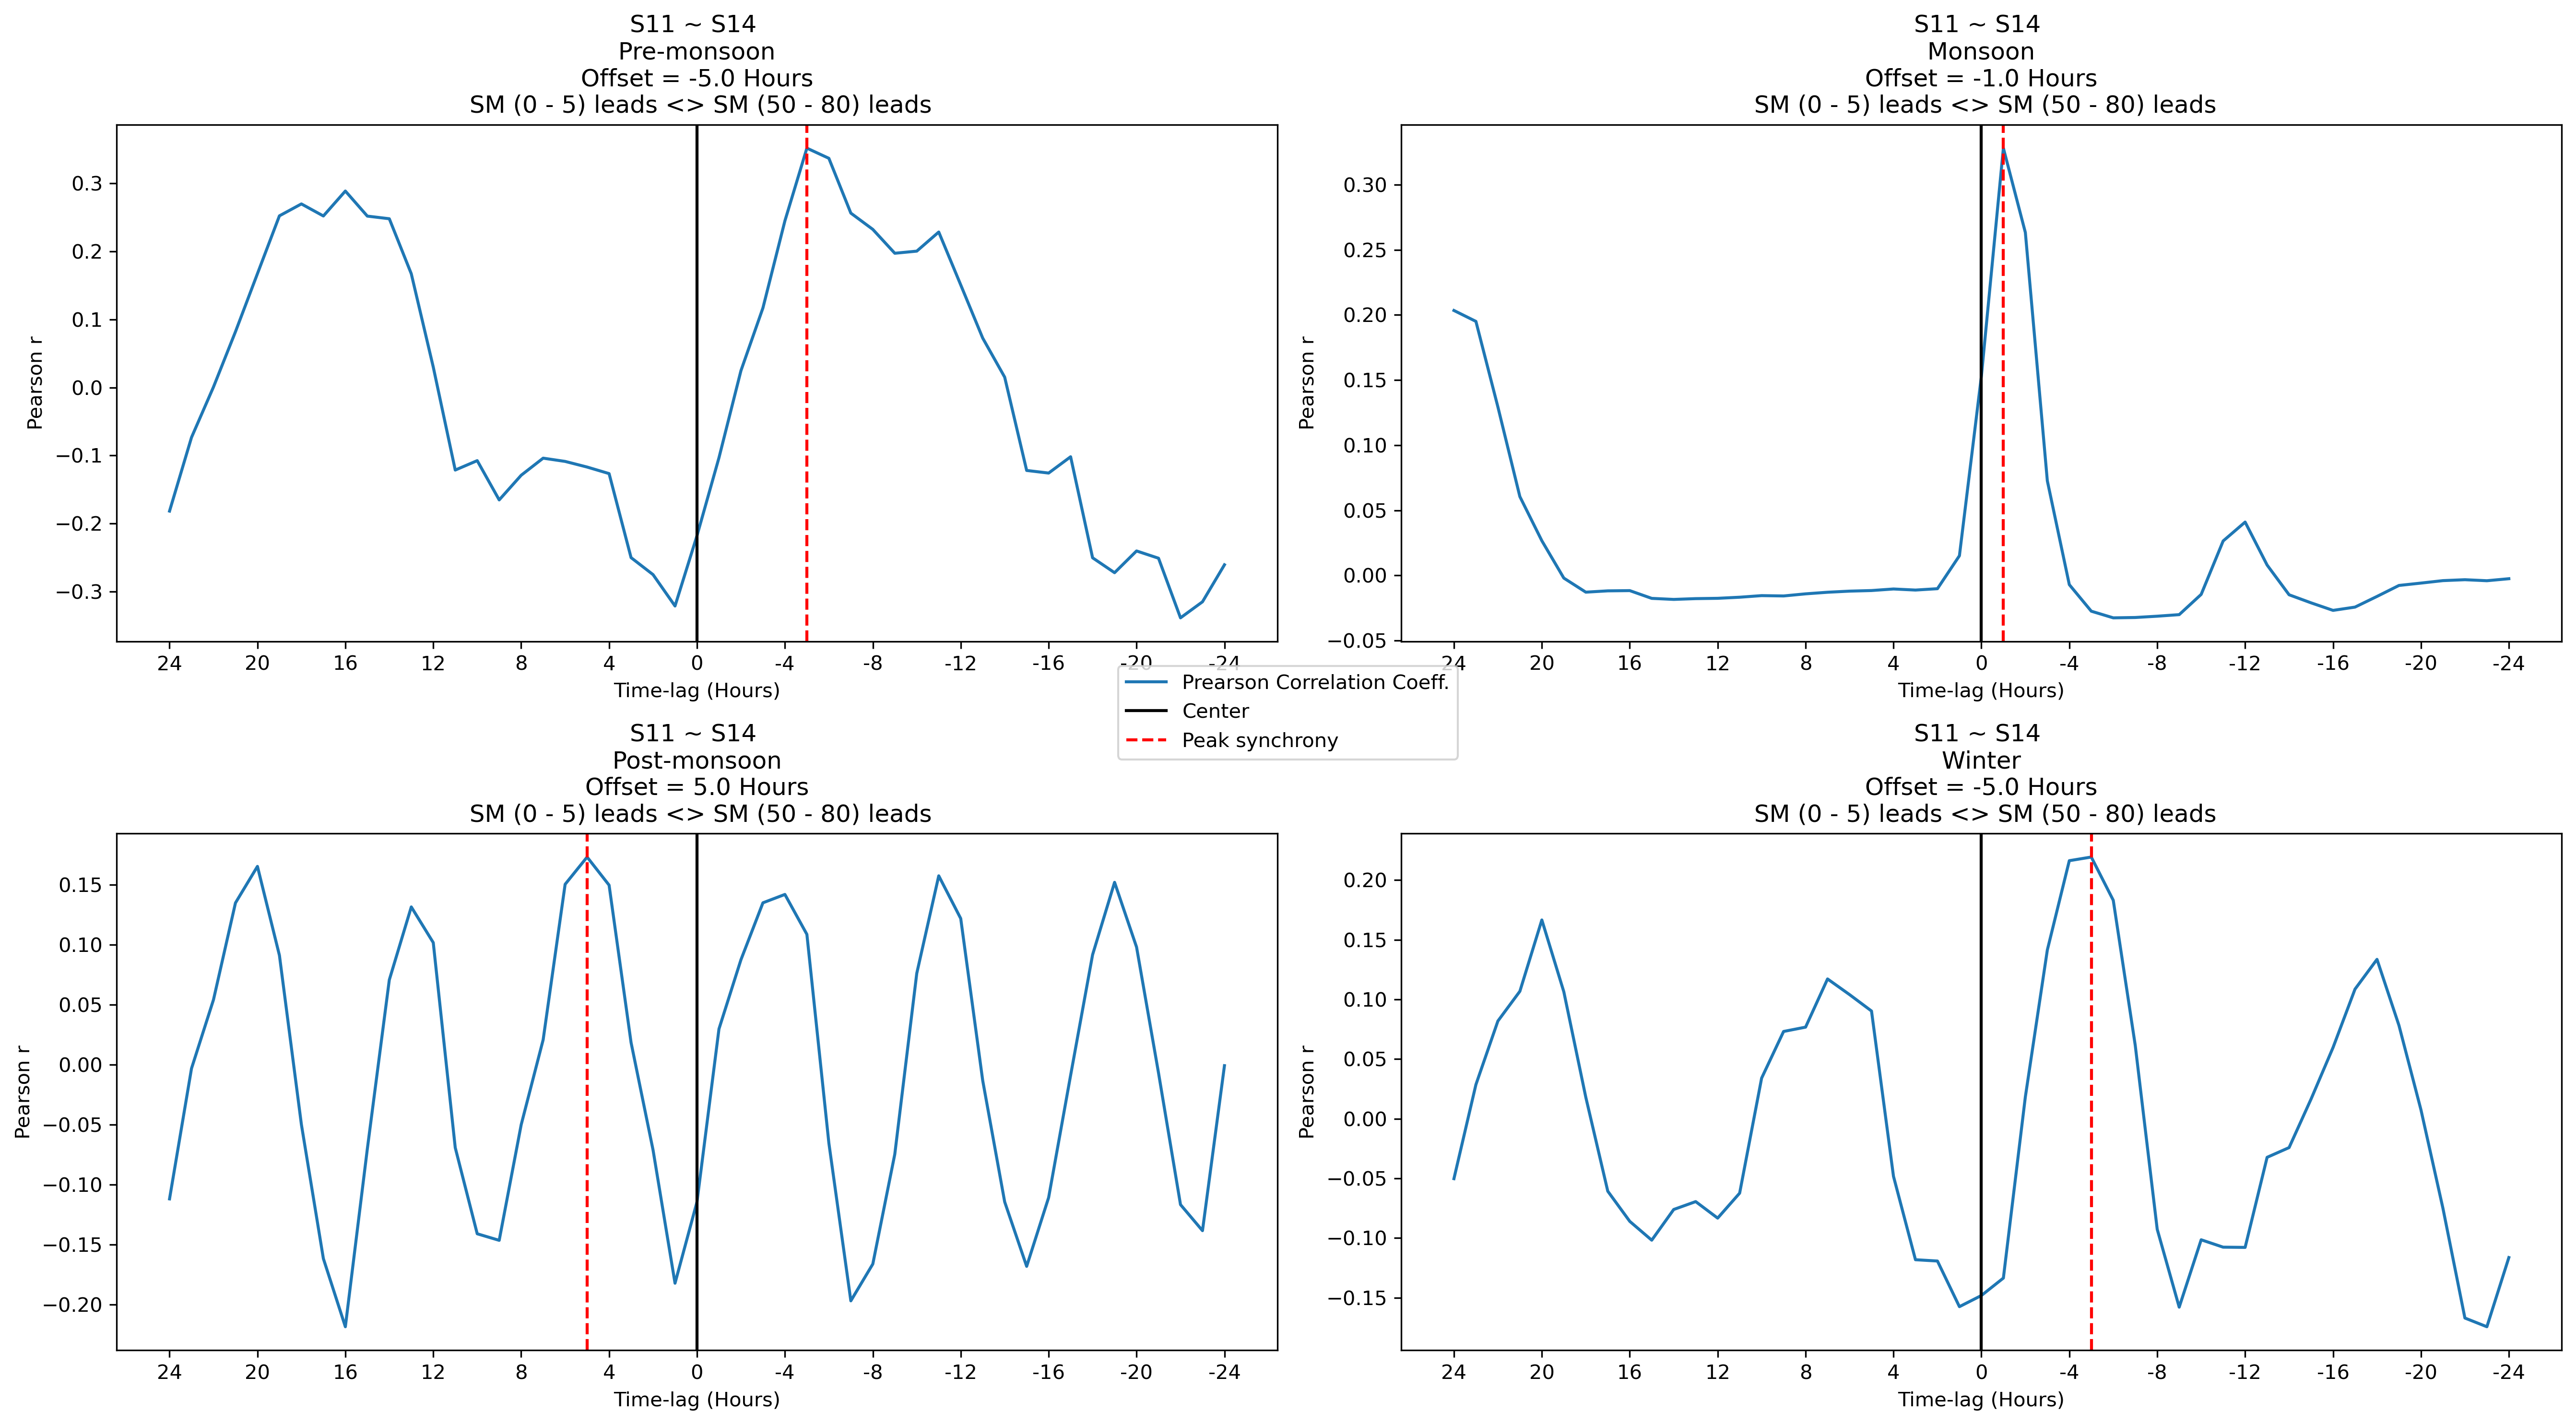

In [344]:
fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(PreMon_S1S4_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(PreMon_S1S4_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(PreMon_S1S4_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S11 ~ S14 \n Pre-monsoon \n Offset = {PreMon_S1S4_offset} Hours \n SM (0 - 5) leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(Mon_S1S4_rs)
ax[0,1].axvline(np.floor(len(Mon_S1S4_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(Mon_S1S4_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S11 ~ S14 \n Monsoon \n Offset = {Mon_S1S4_offset} Hours \n SM (0 - 5) leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(PostMon_S1S4_rs)
ax[1,0].axvline(np.floor(len(PostMon_S1S4_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(PostMon_S1S4_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S11 ~ S14 \n Post-monsoon \n Offset = {PostMon_S1S4_offset} Hours \n SM (0 - 5) leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,1].plot(Winter_S1S4_rs)
ax[1,1].axvline(np.floor(len(Winter_S1S4_rs)/2), color = 'k', linestyle='-')
ax[1,1].axvline(np.argmax(Winter_S1S4_rs), color='r', linestyle='--')
ax[1,1].set(title=f'S11 ~ S14 \n Winter \n Offset = {Winter_S1S4_offset} Hours \n SM (0 - 5) leads <> SM (50 - 80) leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

plt.tight_layout()
# handles, labels = fig.get_legend_handles_labels()
fig.legend(loc = 'center');